In [10]:
html_txt='''
<html>
  <head>
    <title>"Html태그 이해"</title>
  </head>

  <body>
    <div>
       <ul>
           <li>파이<br>썬</li>
           <li>웹 크롤링</li>
           <li>노트북</li>
       </ul>
       <ul class="comp">
           <li>컴퓨터</li>
           <li>하드디스크</li>
           <li>메모리</li>
       </ul>
       <div>
            <ul>
                <li>span</li>
                <li>close</li>
            </ul>
       </div>
    </div>
  </body>
</html>
'''


In [ ]:
html_txt

### Beautiful Soup 이해
- 참조: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [11]:
from bs4 import BeautifulSoup as bs
bs_obj=bs(html_txt, "html.parser")
print(bs_obj)


<html>
<head>
<title>"Html태그 이해"</title>
</head>
<body>
<div>
<ul>
<li>파이<br/>썬</li>
<li>웹 크롤링</li>
<li>노트북</li>
</ul>
<ul class="comp">
<li>컴퓨터</li>
<li>하드디스크</li>
<li>메모리</li>
</ul>
<div>
<ul>
<li>span</li>
<li>close</li>
</ul>
</div>
</div>
</body>
</html>



- BS4를 이용한 태그 찾기 및 텍스트 출력

In [ ]:
# find() : 가장 첫번째 만나는 태그값 출력
ul_html=bs_obj.find('ul')  # bs_obj에서 대그들 중 ul 태그이 첫번째 값을 찾아 출력
ul_html

In [12]:
# find_all(태그): 입력한 태그 전체를 찾아 리스트 형식으로 출력
uls_html=bs_obj.find_all('ul')
uls_html

[<ul>
 <li>파이<br/>썬</li>
 <li>웹 크롤링</li>
 <li>노트북</li>
 </ul>,
 <ul class="comp">
 <li>컴퓨터</li>
 <li>하드디스크</li>
 <li>메모리</li>
 </ul>,
 <ul>
 <li>span</li>
 <li>close</li>
 </ul>]

In [13]:
print(uls_html[0])
lis_html=uls_html[0].find_all("li")
print(lis_html)

<ul>
<li>파이<br/>썬</li>
<li>웹 크롤링</li>
<li>노트북</li>
</ul>
[<li>파이<br/>썬</li>, <li>웹 크롤링</li>, <li>노트북</li>]


In [14]:
# html에서 태그를 벗겨낸 후 택스트만 출력
print(uls_html[0].text)        # 속성 
print(uls_html[0].get_text())  # 메서드


파이썬
웹 크롤링
노트북


파이썬
웹 크롤링
노트북



- bs_obj에서 li 태그가 가지고 있는 값 전체 출력

In [15]:
lis_html=bs_obj.find_all("li")
print(lis_html)

[<li>파이<br/>썬</li>, <li>웹 크롤링</li>, <li>노트북</li>, <li>컴퓨터</li>, <li>하드디스크</li>, <li>메모리</li>, <li>span</li>, <li>close</li>]


In [16]:
txt=""

for li in lis_html:
    txt += li.get_text()+"\n"   # txt=txt+li.get_text()

print(txt)

파이썬
웹 크롤링
노트북
컴퓨터
하드디스크
메모리
span
close



#### 태그에서 특정 클래스/이름은 가지고 있는 대상 찾기

In [ ]:
bs_obj

In [17]:
uls_html=bs_obj.find_all("ul")
print(uls_html[1])
print(uls_html[1].find_all("li"))

<ul class="comp">
<li>컴퓨터</li>
<li>하드디스크</li>
<li>메모리</li>
</ul>
[<li>컴퓨터</li>, <li>하드디스크</li>, <li>메모리</li>]


In [18]:
# ul_html=bs_obj.find("ul", {"class":"comp"})
ul_html=bs_obj.find("ul", class_="comp")     
ul_html

<ul class="comp">
<li>컴퓨터</li>
<li>하드디스크</li>
<li>메모리</li>
</ul>

네이버 사이트에서 메뉴 가져오기

In [ ]:
naver_html='''


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>  <link rel="stylesheet" href="https://pm.pstatic.net/dist/css/nmain.20211202.css"> <link rel="stylesheet" href="https://ssl.pstatic.net/sstatic/search/pc/css/sp_autocomplete_210318.css"> <link rel="shortcut icon" type="image/x-icon" href="/favicon.ico?1"/>  <link rel="apple-touch-icon" sizes="114x114" href="https://s.pstatic.net/static/www/u/2014/0328/mma_204243574.png"/> <link rel="apple-touch-icon" href="https://s.pstatic.net/static/www/u/2014/0328/mma_20432863.png"/> <script>window.nmain=window.nmain||{},window.nmain.supportFlicking=!1;var nsc="navertop.v4",ua=navigator.userAgent;window.nmain.isIE=navigator.appName&&navigator.appName.indexOf("Explorer")>0&&ua.toLocaleLowerCase().indexOf("msie 10.0")<0,document.getElementsByTagName("html")[0].setAttribute("data-useragent",ua),window.nmain.isIE&&(Object.create=function(n){function a(){}return a.prototype=n,new a})</script> <script>var darkmode= false;window.naver_corp_da=window.naver_corp_da||{main:{}},window.naver_corp_da.main=window.naver_corp_da.main||{},window.naver_corp_da.main.darkmode=darkmode,window.gladsdk=window.gladsdk||{cmd:[]},window.gladsdk.cmd.push((function(){window.gladsdk.setHostMeta("theme",darkmode?"dark":"light")}));var customParam={nrefreshx:0};document.cookie.search("PM_CK_nrefreshx=1")>=0&&(customParam.calp=1,customParam.nrefreshx=1),window.ndpsdk=window.ndpsdk||{cmd:[],polyfill:{cmd:[]}}</script>  <script async src="https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js"></script> <script async src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-loader.js"></script>  <script> window.nmain.gv = {  isLogin: "sanjeok73",
userId: "sanjeok73",   daInfo: {"ANIMAL":{"menu":"ANIMAL","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000161","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_animal_1","tb":"ANIMAL_1","unit":"SU10567","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000162","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_animal_2","tb":"ANIMAL_1","unit":"SU10568","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"BEAUTY":{"menu":"BEAUTY","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000163","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_beauty_1","tb":"BEAUTY_1","unit":"SU10595","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000164","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_beauty_2","tb":"BEAUTY_1","unit":"SU10596","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"BUSINESS":{"menu":"BUSINESS","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000165","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_business_1","tb":"BUSINESS_1","unit":"SU10577","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000166","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_business_2","tb":"BUSINESS_1","unit":"SU10578","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"CARGAME":{"menu":"CARGAME","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000167","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_cargame_1","tb":"CARGAME_1","unit":"SU10587","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000168","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_cargame_2","tb":"CARGAME_1","unit":"SU10588","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"CHINA":{"menu":"CHINA","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000169","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_china_1","tb":"CHINA_1","unit":"SU10591","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000170","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_china_2","tb":"CHINA_1","unit":"SU10592","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"DESIGN":{"menu":"DESIGN","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000171","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_design_1","tb":"DESIGN_1","unit":"SU10569","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000172","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_design_2","tb":"DESIGN_1","unit":"SU10570","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"FARM":{"menu":"FARM","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000173","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_farm_1","tb":"FARM_1","unit":"SU10561","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000174","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_farm_2","tb":"FARM_1","unit":"SU10562","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"FINANCE":{"menu":"FINANCE","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000175","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_finance_1","tb":"FINANCE_1","unit":"SU10563","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000176","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_finance_2","tb":"FINANCE_1","unit":"SU10564","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"ITTECH":{"menu":"ITTECH","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000177","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_ittech_1","tb":"ITTECH_1","unit":"SU10593","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000178","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_ittech_2","tb":"ITTECH_1","unit":"SU10594","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"JOB":{"menu":"JOB","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000179","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_job_1","tb":"JOB_1","unit":"SU10589","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000180","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_job_2","tb":"JOB_1","unit":"SU10590","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"LAW":{"menu":"LAW","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000181","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_law_1","tb":"LAW_1","unit":"SU10573","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000182","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_law_2","tb":"LAW_1","unit":"SU10574","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"LIVING":{"menu":"LIVING","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000183","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_living_1","tb":"LIVING_1","unit":"SU10597","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000184","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_living_2","tb":"LIVING_1","unit":"SU10606","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"LIVINGHOME":{"menu":"LIVINGHOME","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000185","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_livinghome_1","tb":"LIVINGHOME_1","unit":"SU10571","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000186","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_livinghome_2","tb":"LIVINGHOME_1","unit":"SU10572","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"MOMKIDS":{"menu":"MOMKIDS","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000187","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_momkids_1","tb":"MOMKIDS_1","unit":"SU10575","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000188","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_momkids_2","tb":"MOMKIDS_1","unit":"SU10576","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"MOVIE":{"menu":"MOVIE","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000189","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_movie_1","tb":"MOVIE_1","unit":"SU10585","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000190","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_movie_2","tb":"MOVIE_1","unit":"SU10586","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"SCHOOL":{"menu":"SCHOOL","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000191","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_school_1","tb":"SCHOOL_1","unit":"SU10579","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000192","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_school_2","tb":"SCHOOL_1","unit":"SU10580","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"SHOW":{"menu":"SHOW","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000193","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_show_1","tb":"SHOW_1","unit":"SU10565","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000194","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_show_2","tb":"SHOW_1","unit":"SU10566","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"TRAVEL":{"menu":"TRAVEL","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000195","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_travel_1","tb":"TRAVEL_1","unit":"SU10581","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000196","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_travel_2","tb":"TRAVEL_1","unit":"SU10582","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]},"WEDDING":{"menu":"WEDDING","childMenu":"","adType":"singleDom","multiDomAdUrl":"","multiDomUnit":"","infoList":[{"adposId":"1000197","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_wedding_1","tb":"WEDDING_1","unit":"SU10583","calp":"-"},"type":{"position":"abs","positionIndex":4,"subject":"contents"},"dom":null},{"adposId":"1000198","singleDomAdUrl":"https://siape.veta.naver.com/fxshow","param":{"da_dom_id":"p_main_wedding_2","tb":"WEDDING_1","unit":"SU10584","calp":"-"},"type":{"position":"abs","positionIndex":8,"subject":"contents"},"dom":null}]}},
svt: 20211206144357,
}; </script> <script> window.nmain.newsstand = {
rcode: '02290107',
newsCastSubsInfo: '',
newsStandSubsInfo: ''
};
window.etc = {  };
window.svr = "<!--cweb311-->"; </script> <script src="https://ssl.pstatic.net/tveta/libs/assets/js/pc/main/min/pc.veta.core.min.js" defer="defer"></script>   <script src="https://pm.pstatic.net/dist/js/external.5f333a53.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script> <script src="https://pm.pstatic.net/dist/js/preload.7eeefc20.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script> <script src="https://pm.pstatic.net/dist/js/polyfill.b14ac6d1.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script>  <script src="https://pm.pstatic.net/dist/js/vendors~more~nmain~notice~search~sidebar_notice.fb26fea7.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script>   <script src="https://pm.pstatic.net/dist/js/search.68cdca8c.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script>  <script src="https://pm.pstatic.net/dist/js/vendors~more~nmain~sidebar_notice.0034da13.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script> <script src="https://pm.pstatic.net/dist/js/nmain.ab8540c1.js?o=www" type="text/javascript" crossorigin="anonymous" defer="defer"></script> <style>:root{color-scheme:light}#_nx_kbd .setkorhelp a{display:none}</style> </head> <body> <div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div> <div id="wrap">         
<style>._1syGnXOL{padding-right:18px;font-size:14px;line-height:0;letter-spacing:-.25px;color:#000}._1syGnXOL span,._1syGnXOL strong{line-height:49px}._1syGnXOL:before{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20211123@2x.png);background-repeat:no-repeat;background-size:116px 112px;width:18px;height:18px;margin:16px 8px 0 0;background-position:-98px 0}[data-useragent*="MSIE 8"] ._1syGnXOL:before{background-image:url(https://static-whale.pstatic.net/main/sprite-20211123.png)}._1syGnXOL._3dsvmZg2:before{background-position:-47px -85px}._1syGnXOL._1NBFx1WK:before{width:20px;height:20px;margin:15px 8px 0 0;background-position:-21px -89px}._1syGnXOL._2mcQEKCd:before{width:22px;height:22px;margin:14px 7px 0 0;background-position:-47px -63px}._1syGnXOL._36slsKuJ:before{width:21px;height:49px;margin:0 14px 0 0;background-position:0 -63px}._1syGnXOL._3di88A4c{padding-right:12px;font-size:17px}._1syGnXOL._3di88A4c:before{content:none}._1syGnXOL ._19K4X1CD{text-decoration:underline}._2aeXMlrb{display:inline-block;position:relative;font-size:12px;height:49px;width:78px;text-decoration:none;color:#fff;font-weight:700;letter-spacing:-.5px;vertical-align:top}._2aeXMlrb span{text-align:center;margin:9px 0;height:31px;display:block;line-height:31px;border-radius:15px}._2aeXMlrb span:before{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20211123@2x.png);background-repeat:no-repeat;background-size:116px 112px}[data-useragent*="MSIE 8"] ._2aeXMlrb span:before{background-image:url(https://static-whale.pstatic.net/main/sprite-20211123.png)}._2aeXMlrb.BMgpjddw{font-size:11px;width:94px}._2aeXMlrb.BMgpjddw span:before{margin:9px 3px 0 0;width:17px;height:13px;background-position:-89px -63px}._3h-N8T9V{position:absolute;top:0;left:0;right:0;bottom:0;background:rgba(0,0,0,0)}._1KncATpM{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20211123@2x.png);background-repeat:no-repeat;background-size:116px 112px;margin-top:14px;float:left;width:98px;height:21px;background-position:0 -21px}[data-useragent*="MSIE 8"] ._1KncATpM{background-image:url(https://static-whale.pstatic.net/main/sprite-20211123.png)}._1KncATpM._2v3uxv2x{background-position:0 0}._1KncATpM._1yl_Ow6o{background-position:0 -42px}._20PYt6lT{font-size:11px;height:49px;cursor:pointer;position:absolute;top:0;right:0;color:#666;opacity:.7}._20PYt6lT:after{width:15px;height:15px;margin-left:4px;background-position:-98px -33px;display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20211123@2x.png);background-repeat:no-repeat;background-size:116px 112px}[data-useragent*="MSIE 8"] ._20PYt6lT:after{background-image:url(https://static-whale.pstatic.net/main/sprite-20211123.png)}._20PYt6lT._39oMCV2N:after{background-position:-98px -18px}._20PYt6lT._3MOWOORv{color:#c3c2c2}._20PYt6lT._3MOWOORv:after{background-position:-80px -85px}._20PYt6lT._3wm5EzmJ{color:#fff}._20PYt6lT._3wm5EzmJ:after{background-position:-65px -85px}._1hiMWemA{height:49px}._1hiMWemA .tY_u8r23{position:relative;width:1130px;margin:0 auto}._1hiMWemA .tY_u8r23 a{text-decoration:none}._1hiMWemA._23U_6TM_{position:relative}._1hiMWemA._23U_6TM_:after{position:absolute;z-index:1;content:"";display:block;width:100%;height:1px;bottom:0;background-color:rgba(0,0,0,.050980392156862744)}
</style>
<div id="NM_TOP_BANNER" data-clk-prefix="top" class="_1hiMWemA" style="background-color: #d4f8ff">
<div class="tY_u8r23">
<a class="_3h-N8T9V" href="https://whale.naver.com/banner/details/darkmode?=main&wpid=RydDy7"
data-clk="dropbanner1b"></a><i class="_1KncATpM"><span class="blind">NAVER whale</span></i><img
src="https://static-whale.pstatic.net/main/img_darkmode_v5.1@2x.png"
width="98"
height="49"
alt=""
style="padding-left: 54px"
/><span
class="_1syGnXOL _3di88A4c"
data-clk="dropbanner1b"
style="
padding-right: 20px;
font-size: 18px;
color: #010101;
padding-left: 39px;
"
><span>눈 건강 지킴이 </span><strong style="color: #008aff">웨일 다크 모드! </strong><span>지금 바로 사용해보세요</span></span><a
href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" class="_2aeXMlrb BMgpjddw" id="NM_whale_download_btn"
data-clk="dropdownload1b"><span style="background-color: #1f97fd">다운로드</span></a><button
type="button"
data-ui-cookie-exp-days="3"
data-ui-cookie-key="NM_TOP_PROMOTION"
data-ui-cookie-value="1"
data-ui-hide-target="#NM_TOP_BANNER"
data-clk="dropclose1b"
class="_20PYt6lT _39oMCV2N"
>
3일 동안 보지 않기
</button>
</div>
</div>  <div id="header" role="banner">








<div class="special_bg">
<div class="group_flex">
<div class="logo_area">
<h1 class="logo_default">
<a href="/" class="logo_naver" data-clk="top.logo"
><span class="blind">네이버</span></a
>
</h1>
</div>
<div class="service_area">
<a id="NM_set_home_btn" href="https://help.naver.com/support/welcomePage/guide.help" class="link_set" data-clk="top.mkhome">네이버를 시작페이지로</a>
<i class="sa_bar"></i>
<a href="https://jr.naver.com" class="link_jrnaver" data-clk="top.jrnaver"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>
<a href="https://happybean.naver.com" class="link_happybin" data-clk="top.happybean"><i class="ico_happybin"></i><span class="blind">해피빈</span></a>
</div>

<div id="search" class="search_area" data-clk-prefix="sch">
<form id="sform" name="sform" action="https://search.naver.com/search.naver" method="get" role="search">
<fieldset>
<legend class="blind">검색</legend>
<select id="where" name="where" title="검색 범위 선택" class="blind">
<option value="nexearch" selected="selected">통합검색</option><option value="post">블로그</option><option value="cafeblog">카페</option><option value="cafe">- 카페명</option><option value="article">- 카페글</option><option value="kin">지식iN</option><option value="news">뉴스</option><option value="web">사이트</option><option value="category">- 카테고리</option><option value="site">- 사이트</option><option value="movie">영화</option><option value="webkr">웹문서</option><option value="dic">사전</option><option value="100">- 백과사전</option><option value="endic">- 영어사전</option><option value="eedic">- 영영사전</option><option value="krdic">- 국어사전</option><option value="jpdic">- 일본어사전</option><option value="hanja">- 한자사전</option><option value="terms">- 용어사전</option><option value="book">책</option><option value="music">음악</option><option value="doc">전문자료</option><option value="shop">쇼핑</option><option value="local">지역</option><option value="video">동영상</option><option value="image">이미지</option><option value="mypc">내PC</option><optgroup label="스마트 파인더"><option value="movie">영화</option><option value="auto">자동차</option><option value="game">게임</option><option value="health">건강</option><option value="people">인물</option></optgroup><optgroup label="네이버 랩"><option>긍정부정검색</option></optgroup>
</select>
<input type="hidden" id="sm" name="sm" value="top_hty" />
<input type="hidden" id="fbm" name="fbm" value="0" />
<input type="hidden" id="acr" name="acr" value="" disabled="disabled" />
<input type="hidden" id="acq" name="acq" value="" disabled="disabled" />
<input type="hidden" id="qdt" name="qdt" value="" disabled="disabled" />
<input type="hidden" id="ie" name="ie" value="utf8" />
<input type="hidden" id="acir" name="acir" value="" disabled="disabled" />
<input type="hidden" id="os" name="os" value="" disabled="disabled" />
<input type="hidden" id="bid" name="bid" value="" disabled="disabled" />
<input type="hidden" id="pkid" name="pkid" value="" disabled="disabled" />
<input type="hidden" id="eid" name="eid" value="" disabled="disabled" />
<input type="hidden" id="mra" name="mra" value="" disabled="disabled" />



<div class="green_window" style=''>
<!-- [AU] data-atcmp-element 에 해당하는 attribute를 추가해주세요. -->
<input id="query" name="query" type="text" title="검색어 입력" maxlength="255" class="input_text" tabindex="1" accesskey="s" style="ime-mode:active;" autocomplete="off"  placeholder="검색어를 입력해 주세요." onclick="document.getElementById('fbm').value=1;" value="" data-atcmp-element>
</div>
<button id="search_btn" type="submit" title="검색" tabindex="3" class="btn_submit" onclick="window.nclick(this,'sch.action','','',event);" style=''>
<span class="blind">검색</span>
<span class="ico_search_submit"></span>
</button>
</fieldset>
</form>
<!-- 한글입력기 -->
<a href="#" id="ke_kbd_btn" role="button" class="btn_keyboard" onclick="return false;"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>
<div id="_nx_kbd" style="display:none;"></div>
<div class="autocomplete">
<!-- 자동완성 열린 경우 fold 클래스 추가, 딤드인 경우 dim 추가 -->
<a href="#" role="button" id="nautocomplete" tabindex="2" class="btn_arw _btn_arw fold" aria-pressed="false" data-atcmp-element><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>
</div>
<!-- 자동완성레이어 -->
<div id="autoFrame" class="reatcmp" style="display: none;">
<!-- [AU] data-atcmp-element attribute를 추가해주세요. -->
<div class="ly_atcmp" data-atcmp-element>
<div class="api_atcmp_wrap">
<!-- 최근검색어 -->
<!-- [AU] _recent_layer 클래스를 추가해주세요. -->
<div class="atcmp_fixer _recent_layer" style="display:none;">
<!-- [AU] _recent_header 클래스를 추가해주세요. -->
<div class="atcmp_header _recent_header">
<strong class="tit">최근검색어</strong>
<div class="option">
<!-- [AU] _delAll 클래스를 추가해주세요. -->
<a role="button" href="#" class="item _delAll" aria-pressed="false">전체삭제</a>
</div>
</div>
<div class="atcmp_container">
<!-- [AU] _recent 클래스를 추가해주세요. -->
<ul class="kwd_lst _recent">
<!-- 최근검색어 템플릿 -->
<!-- [AU] _item 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
<li class="item _item" data-rank="@rank@" data-template-type="history" data-keyword="@in_txt@">
<a href="#" class="kwd">
<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>
</a>
<span class="etc">
<em class="date">@date@.</em>
<!-- [AU] _del 클래스를 추가해주세요. -->
<a href="#" role="button" class="bt_item _del" aria-pressed="false"><i class="imsc ico_del">삭제</i></a>
</span>
</li>
</ul>
<!-- [D] 검색어 저장 꺼진 경우 atcmp_fixer에 type_off 추가 -->
<!-- [AU] _offMsg 클래스를 추가해주세요. -->
<div class="kwd_info kwd_off _offMsg" style="display: none;">검색어 저장 기능이 꺼져 있습니다.<br><span class="kwd_dsc">설정이 초기화 된다면 <a href="https://help.naver.com/support/alias/search/word/word_29.naver" class="kwd_help" data-clk="sly.help" target="_blank">도움말</a>을 확인해주세요.</span></div>
<!-- [D] 검색어 내역 없는 경우 atcmp_fixer에 type_off 추가 -->
<!-- [AU] _recentNone 클래스를 추가해주세요. -->
<div class="kwd_info kwd_none _recentNone" style="display: none;">최근 검색어 내역이 없습니다.<br><span class="kwd_dsc">설정이 초기화 된다면 <a href="https://help.naver.com/support/alias/search/word/word_29.naver" class="kwd_help" data-clk="sly.help" target="_blank">도움말</a>을 확인해주세요.</span></div>
</div>
<div class="atcmp_footer">
<span class="side_opt_area">
<span class="opt_item"><a href="https://help.naver.com/support/service/main.help?serviceNo=605&amp;categoryNo=1991" data-clk="sly.help" target="_blank">도움말</a></span>
</span>
<span class="rside_opt_area">
<span class="opt_item">
<!-- [AU] _keywordOnOff 클래스를 추가해주세요. -->
<a href="#" class="close _keywordOnOff">자동저장 끄기</a>
</span>
</span>
</div>
</div>
<!-- 자동완성 -->
<!-- [AU] _atcmp_layer 클래스를 추가해주세요. -->
<div class="atcmp_fixer _atcmp_layer" style="display:none;">
<!-- [AU] _words 클래스를 추가해주세요. -->
<div class="atcmp_container _words">
<!-- 정답형 템플릿 : 로또당첨번호 -->
<!-- [AU] _answer 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="answer_3" data-code="@code@" data-keyword="@1@" attribute를 추가해주세요. -->
<div class="atcmp_correct type_lotto _answer" data-template-type="answer_3" data-code="@code@" data-keyword="@1@">
<a href="#" class="link_item">
<span class="common_ico_kwd"><i class="imsc ico_search"></i></span>
<div class="dsc_area">
<span class="tit">@5@회차 당첨번호</span>
<span class="dsc">
<span class="item">추첨 @13@.</span><span class="item">지급기한 1년</span>
</span>
</div>
<span class="etc_area">
<span class="etc lotto">
<em class="n@6@">@6@</em><em class="n@7@">@7@</em><em class="n@8@">@8@</em><em class="n@9@">@9@</em><em class="n@10@">@10@</em><em class="n@11@">@11@</em><em class="imsc_bf bonus n@12@">@12@</em>
</span>
</span>
</a>
</div>
<!-- 정답형 템플릿 : 환율 -->
<!-- [AU] _answer 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="answer_9" data-code="@code@" data-keyword="@1@" attribute를 추가해주세요. -->
<div class="atcmp_correct type_exchange _answer" data-template-type="answer_9" data-code="@code@" data-keyword="@1@">
<!-- [D] 상승 up, 하락 down 추가 -->
<a href="#" class="link_item @11@">
<!-- [D] 국가별 class 가나다순
ZAR 남아프리카 공화국
NPR 네팔
NOK 노르웨이
NZD 뉴질랜드
TWD 대만
DKK 덴마크
RUB 러시아
MOP 마카오
MYR 말레이시아
MXN 멕시코
MNT 몽골
USD 미국
BHD 바레인
BDT 방글라데시
VND 베트남
BRL 브라질
SAR 사우디아라비아
SEK 스웨덴
CHF 스위스
SGD 싱가포르
AED 아랍에미리트
GBP 영국
EUR 유럽연합
ILS 이스라엘
EGP 이집트
INR 인도
IDR 인도네시아
JPY 일본
CNY 중국
CZK 체코
CLP 칠레
KZT 카자흐스탄
QAR 카타르
CAD 캐나다
KWD 쿠웨이트
THB 태국
TRY 터키
PKR 파키스탄
PLN 폴란드
PHP 필리핀
HUF 헝가리
AUD 호주
HKD 홍콩
-->
<span class="common_ico_kwd"><i class="imsc ico @12@">@14@</i></span>
<div class="dsc_area">
<span class="tit">@txt@<span class="sub">@currency@</span></span>
<span class="dsc">
<span class="item"><i class="imsc ico_arr"></i>@8@(@9@%)</span>
</span>
</div>
<span class="etc_area">
<span class="etc"><em class="num">@6@</em>원</span>
</span>
</a>
</div>
<!-- 정답형 템플릿 : 날씨(국내11, 해외12) -->
<!-- [AU] _answer 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="answer_11" data-code="@code@" data-keyword="@1@" attribute를 추가해주세요. -->
<div class="atcmp_correct type_weather _answer" data-template-type="answer_11" data-code="@code@" data-keyword="@1@">
<!-- [D] 상승 up, 하락 down 추가 -->
<a href="#" class="link_item @12@">
<span class="common_ico_kwd"><i class="imsc ico_search"></i></span>
<div class="dsc_area">
<span class="tit">@txt@</span>
<span class="dsc">
<span class="item">@7@, @message@</span>
</span>
</div>
<span class="etc_area">
<span class="etc">
<!-- [D] 날씨별 class
ico1 맑음(낮)
ico2 맑음(밤)
ico3 구름조금(낮)
ico4 구름조금(밤)
ico5 구름많음(낮)
ico6 구름많음(밤)
ico7 흐림
ico8 약한비
ico9 비
ico10 강한비
ico11 약한눈
ico12 눈
ico13 강한눈
ico14 진눈깨비
ico15 소나기
ico16 안개
ico17 소낙눈
ico18 번개뇌우
ico19 우박
ico20 황사
ico21 비또는눈
ico22 가끔비
ico23 가끔눈
ico24 가끔비또는눈
ico25 흐린후갬
ico26 뇌우후갬
ico27 비후갬
ico28 눈후갬
ico29 흐려져비
ico30 흐려져눈
-->
<span class="ico_weather"><i class="imsc ico ico@iconNo@">@7@</i></span>
<em class="degree">@8@<sup class="celsius">°</sup></em>
</span>
</span>
</a>
</div>
<!-- 정답형 템플릿 : 사이트 바로가기 -->
<!-- [AU] _answer 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="answer_17" data-code="@code@" data-keyword="@1@" attribute를 추가해주세요. -->
<div class="atcmp_correct type_site _answer" data-template-type="answer_17" data-code="@code@" data-keyword="@1@">
<a href="@5@" class="link_item" target="_blank">
<span class="common_ico_kwd"><i class="imsc ico_url"></i></span>
<div class="dsc_area">
<span class="tit">@txt@</span>
<span class="dsc">
<span class="item">@5@</span>
</span>
</div>
<span class="etc_area">
<span class="etc">바로가기</span>
</span>
</a>
</div>
<!-- [AU] _kwd_list 클래스를 추가해주세요. -->
<ul class="kwd_lst _kwd_list">
<!-- [AU] 자동완성 검색어 템플릿 -->
<!-- [AU] _item 클래스를 추가해주세요. -->
<!-- [AU] data-rank="@rank@" data-template-type="suggestion" data-keyword="@in_txt@" attribute를 추가해주세요. -->
<li class="item _item" data-rank="@rank@" data-template-type="suggestion" data-keyword="@in_txt@">
<a href="#" class="kwd">
<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>
</a>
<span class="etc">
<a href="#" role="button" class="bt_item _add" aria-pressed="false"><i class="imsc ico_insert">추가</i></a>
</span>
</li>
<!-- [AU] 최근검색어 템플릿 -->
<!-- [AU] _item 클래스를 추가해주세요. -->
<!-- [AU] data-rank="@rank@" data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
<li class="item has_correct _item" data-rank="@rank@" data-template-type="history" data-keyword="@in_txt@">
<a href="#" class="kwd">
<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>
</a>
<span class="etc">
<!-- 최근검색어 있으면 날짜 표시 -->
<em class="date">@date@.</em>
<a href="#" role="button" class="bt_item _add" aria-pressed="false"><i class="imsc ico_insert">추가</i></a>
</span>
</li>
</ul>
<!-- [AU] 문맥검색 템플릿 -->
<!-- [AU] _item 클래스를 추가해주세요. -->
<!-- [AU] data-rank="@rank@" data-template-type="intend" data-keyword="@transQuery@" attribute를 추가해주세요. -->
<li class="item has_correct _item" data-rank="@rank@" data-intend-rank="@intendRank@" data-template-type="intend" data-keyword="@transQuery@">
<a href="#" class="kwd">
<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>
</a>
<span class="etc">
<a href="#" role="button" class="bt_item _add" aria-pressed="false"><i class="imsc ico_insert">추가</i></a>
</span>
</li>
<!-- [D] 선거안내문구 -->
<!-- [AU] _alert 클래스를 추가해주세요. -->
<div class="atcmp_alert _alert">
<div class="dsc_election">
<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>
<span class="dsc_inner">
<!-- [AU] _alert_passage2 클래스를 추가해주세요. -->
<span class="_alert_passage2"></span>
<!-- [AU] _alert_link 클래스를 추가해주세요. -->
<a href="#" class="link _alert_link" target="_blank">자세히보기</a>
</span>
</div>
</div>
<!-- [AU] _plus 클래스를 추가해주세요. -->
<div class="atcmp_plus _plus">
<div class="dsc_plus">
<a href="https://help.naver.com/support/alias/search/word/word_16.naver" class="link_dsc" data-clk="sug.cxhelp" target="_blank">관심사를 반영한 컨텍스트 자동완성<i class="imsc ico_help">도움말</i></a>
</div>
<div class="switch">
<!-- [D] 선택시 aria-pressed="ture/false" -->
<!-- [AU] _plus_btn 클래스를 추가해주세요. -->
<a role="button" href="#" class="bt_switch active _plus_btn" aria-pressed="false"><i class="imsc ico_option">컨텍스트 자동완성</i></a>
</div>
<!-- [AU] _plus_layer 클래스를 추가해주세요. -->
<div class="layer_plus _plus_layer">
<strong class="tit">컨텍스트 자동완성</strong>
<!-- [AU] _plus_layer_isloggedin 클래스를 추가해주세요. -->
<!-- [AU] style="display:none" 추가해주세요. -->
<div class="_plus_layer_isloggedin" style="display:none">
<p class="dsc">ON/OFF 설정은<br>해당기기(브라우저)에 저장됩니다.</p>
<div class="btn_area">
<a href="https://help.naver.com/support/alias/search/word/word_16.naver" class="btn btn_view" data-clk="sug.cxlink" target="_blank">자세히</a>
</div>
</div>
<!-- [AU] _plus_layer_isnotloggedin 클래스를 추가해주세요. -->
<!-- [AU] style="display:none" 추가해주세요. -->
<div class="_plus_layer_isnotloggedin" style="display:none">
<p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br>관심사에 맞춰 자동완성을 제공합니다.</p>
<div class="btn_area">
<a href="https://nid.naver.com/nidlogin.login" class="btn btn_login" data-clk="sug.cxlogin">로그인</a>
<a href="https://help.naver.com/support/alias/search/word/word_16.naver" class="btn btn_view" data-clk="sug.cxlink" target="_blank">자세히</a>
</div>
</div>
<!-- [AU] _plus_layer_close 클래스를 추가해주세요. -->
<a href="#" role="button" class="btn_close _plus_layer_close"><i class="imsc ico_close">컨텍스트 자동완성 레이어 닫기</i></a>
</div>
</div>
</div>
<div class="atcmp_footer">
<span class="side_opt_area">
<span class="opt_item"><a href="https://help.naver.com/support/service/main.help?serviceNo=605&categoryNo=1987" data-clk="sug.help" target="_blank">도움말</a></span>
<span class="opt_item"><a href="https://help.naver.com/support/contents/contents.help?serviceNo=605&categoryNo=18215" class="report" data-clk="sug.report" target="_blank">신고</a></span>
</span>
<span class="rside_opt_area">
<span class="opt_item">
<!-- [AU] _suggestOnOff 클래스를 추가해주세요. -->
<a href="#" class="close _suggestOnOff">자동완성 끄기</a>
</span>
</span>
</div>
</div>
</div>
</div>
</div>
</div>

</div>
</div>

<!--EMPTY-->
<div id="gnb">
<div id="NM_FAVORITE" class="gnb_inner">
<div class="group_nav">
<ul class="list_nav type_fix">
<li class="nav_item">
<a href="https://mail.naver.com/" class="nav" data-clk="svc.mail"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a href="https://section.cafe.naver.com/" class="nav" data-clk="svc.cafe">카페</a></li>
<li class="nav_item"><a href="https://section.blog.naver.com/" class="nav" data-clk="svc.blog">블로그</a></li>
<li class="nav_item"><a href="https://kin.naver.com/" class="nav" data-clk="svc.kin">지식iN</a></li>
<li class="nav_item"><a href="https://shopping.naver.com/" class="nav shop" data-clk="svc.shopping"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a href="https://shoppinglive.naver.com/home" class="nav shoplive"
data-clk="svc.shoppinglive"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a href="https://order.pay.naver.com/home" class="nav" data-clk="svc.pay">Pay</a></li>
<li class="nav_item">
<a href="https://tv.naver.com/" class="nav" data-clk="svc.tvcast"><i class="ico_tv"></i>TV</a>
</li>
</ul>
<ul
class="list_nav NM_FAVORITE_LIST"
>
<li class="nav_item"><a href="https://dict.naver.com/" class="nav" data-clk="svc.dic">사전</a></li>
<li class="nav_item"><a href="https://news.naver.com/" class="nav" data-clk="svc.news">뉴스</a></li>
<li class="nav_item"><a href="https://finance.naver.com/" class="nav" data-clk="svc.stock">증권</a></li>
<li class="nav_item"><a href="https://land.naver.com/" class="nav" data-clk="svc.land">부동산</a></li>
<li class="nav_item"><a href="https://map.naver.com/" class="nav" data-clk="svc.map">지도</a></li>
<li class="nav_item"><a href="https://vibe.naver.com/" class="nav" data-clk="svc.vibe">VIBE</a></li>
<li class="nav_item"><a href="https://book.naver.com/" class="nav" data-clk="svc.book">책</a></li>
<li class="nav_item"><a href="https://comic.naver.com/" class="nav" data-clk="svc.webtoon">웹툰</a></li>

</ul>
<ul class="list_nav type_empty" style="display: none;"></ul>
<a href="#" role="button" class="btn_more" data-clk="svc.more">더보기</a>
<div class="ly_btn_area">
<a href="more.html" class="btn NM_FAVORITE_ALL" data-clk="map.svcmore">서비스 전체보기</a>
<a href="#" role="button" class="btn btn_set" data-clk="map.edit">메뉴설정</a>
<a href="#" role="button" class="btn btn_reset" data-clk="edt.reset">초기화</a>
<a href="#" role="button" class="btn btn_save" data-clk="edt.save">저장</a>
</div>
</div>
<div id="NM_WEATHER" class="group_weather">
<div>
<a data-clk="squ.weat" href="https://weather.naver.com/today/02290107" class="weather_area ico_w05">
<div class="current_box">
<strong class="current" aria-label="현재기온">12.5°</strong><strong class="state">구름많음</strong>
</div>
<div class="degree_box">
<span class="min" aria-label="최저기온">-3.0°</span><span class="max" aria-label="최고기온">12.0°</span>
</div>
<span class="location">중앙동</span>
</a>
</div>
<div>
<a data-clk="squ.dust" href="https://weather.naver.com/today/02290107" class="air_area">
<ul class="list_air">
<li class="air_item">미세<strong class="state state_good">좋음</strong></li>
<li class="air_item">초미세<strong class="state state_good">좋음</strong></li>
</ul>
<span class="location">중앙동</span>
</a>
</div>

</div>
</div>
<div class="ly_service">
<div class="group_service NM_FAVORITE_ALL_LY"></div>
<div class="group_service NM_FAVORITE_EDIT_LY" style="display: none;"></div>
</div>
</div>
</div>
 <div id="container" role="main"> <div style="position:relative;width:1130px;margin:0 auto;z-index:11"> <div id="da_top"></div> <div id="da_expwide"></div> </div> <div id="NM_INT_LEFT" class="column_left"> <div id="veta_top"> <div id="veta_top_inner" style="height:135px">  <script>gladsdk.cmd.push((function(){gladsdk.defineAdSlot({adUnitId:"p_main_timeboard",adSlotElementId:"veta_top_inner",customParam:customParam}),gladsdk.displayAd("veta_top_inner")}))</script>  </div> <span class="veta_bd_t"></span> <span class="veta_bd_b"></span> <span class="veta_bd_l"></span> <span class="veta_bd_r"></span> </div> <div id="newsstand" class="sc_newscast"> <h2 class="blind">뉴스스탠드</h2> <div id="NM_NEWSSTAND_HEADER" class="group_issue" data-clk-prefix="ncy"> <div class="issue_area"> <div id="NM_ONELINE_NAME" class="link_media">동아일보</div>
<div id="NM_ONELINE_ROLLING" class="list_issue" data-nm-ui="rolling">
	
		<div data-office-name="동아일보" data-office-id="020" data-sort-order="0">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;020&amp;aid&#x3D;0003397835" class="issue" data-clk="quickarticle">“대출규제에 아파트 잔금 막막”…대부업체로 내몰려</a>
		</div>
	
		<div data-office-name="매일신문" data-office-id="088" data-sort-order="1">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;088&amp;aid&#x3D;0000734362" class="issue" data-clk="quickarticle">&#x27;접종 강요&#x27; 반발에도 청소년 방역패스 강행…&quot;감염 보호 가치 커&quot;</a>
		</div>
	
		<div data-office-name="중앙일보" data-office-id="025" data-sort-order="2">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;025&amp;aid&#x3D;0003156412" class="issue" data-clk="quickarticle">아버지 산소 찾은 장제원 &quot;막내 손자가 큰 잘못, 면목이 없다&quot;</a>
		</div>
	
		<div data-office-name="YTN" data-office-id="052" data-sort-order="3">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;052&amp;aid&#x3D;0001673719" class="issue" data-clk="quickarticle">오미크론 감염 확인 12명 증가...&quot;오미크론 대응 집중&quot;</a>
		</div>
	
		<div data-office-name="뉴스1" data-office-id="421" data-sort-order="4">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;421&amp;aid&#x3D;0005767077" class="issue" data-clk="quickarticle">[속보]주간 감염재생산 지수, 전국 1.16…질병청 &quot;6주 연속 확산세&quot;</a>
		</div>
	
		<div data-office-name="한국경제" data-office-id="015" data-sort-order="5">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;015&amp;aid&#x3D;0004637083" class="issue" data-clk="quickarticle">&quot;11억 주고 산 아파트, 한 달 만에&quot;…&#x27;패닉바잉&#x27; 2030 속탄다</a>
		</div>
	
		<div data-office-name="JTBC" data-office-id="437" data-sort-order="6">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;437&amp;aid&#x3D;0000282723" class="issue" data-clk="quickarticle">전국 코로나 위험도 2주째 &#x27;매우 높음&#x27;…&quot;의료역량 한계 초과&quot;</a>
		</div>
	
		<div data-office-name="매일경제" data-office-id="009" data-sort-order="7">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;103&amp;oid&#x3D;009&amp;aid&#x3D;0004889265" class="issue" data-clk="quickarticle">강민경 유인영 정려원도 &#x27;푹&#x27; 빠졌다…겨울철 불티나게 팔리는 이것</a>
		</div>
	
		<div data-office-name="조선일보" data-office-id="023" data-sort-order="8">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;023&amp;aid&#x3D;0003657715" class="issue" data-clk="quickarticle">입주 물량 2배 늘어난 세종시, 5년만에 미분양 나왔다</a>
		</div>
	
		<div data-office-name="SBS" data-office-id="055" data-sort-order="9">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;104&amp;oid&#x3D;055&amp;aid&#x3D;0000937792" class="issue" data-clk="quickarticle">&quot;새 변이&quot; 남아공 보고 &#x27;하루 전&#x27;, 미국에 감염자 있었다</a>
		</div>
	
		<div data-office-name="KBS" data-office-id="056" data-sort-order="10">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;056&amp;aid&#x3D;0011170182" class="issue" data-clk="quickarticle">방역당국 “청소년 방역패스 더 늦출 이유 없어…학습권 보다 감염으로부터 보호가 더 중요”</a>
		</div>
	
		<div data-office-name="한국일보" data-office-id="469" data-sort-order="11">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;469&amp;aid&#x3D;0000645116" class="issue" data-clk="quickarticle">김종인 마음 돌린 일등공신은? 포도주, 아내, 한 통의 전화</a>
		</div>
	
		<div data-office-name="MBC" data-office-id="214" data-sort-order="12">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;214&amp;aid&#x3D;0001164225" class="issue" data-clk="quickarticle">위중증 700명대‥오미크론 감염 12명 추가</a>
		</div>
	
		<div data-office-name="한겨레" data-office-id="028" data-sort-order="13">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;105&amp;oid&#x3D;028&amp;aid&#x3D;0002570527" class="issue" data-clk="quickarticle">당근마켓, ‘세자릿수 채용’ 나서…개발자 초임 6500만원 ‘업계 최고’</a>
		</div>
	
		<div data-office-name="헤럴드경제" data-office-id="016" data-sort-order="14">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;016&amp;aid&#x3D;0001920958" class="issue" data-clk="quickarticle">[단독] 밀크(MiL.K)까지 품는 카카오…가상자산 생태계 무한확장</a>
		</div>
	
		<div data-office-name="아시아경제" data-office-id="277" data-sort-order="15">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;277&amp;aid&#x3D;0005010882" class="issue" data-clk="quickarticle">코인 폭락에 관련주 흔들…韓도 美도 &#x27;왝더독&#x27; 현상</a>
		</div>
	
		<div data-office-name="서울경제" data-office-id="011" data-sort-order="16">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;011&amp;aid&#x3D;0003993439" class="issue" data-clk="quickarticle">이재명 &quot;대장동 특검 100% 환영···尹 피하면 범인&quot;</a>
		</div>
	
		<div data-office-name="서울신문" data-office-id="081" data-sort-order="17">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;081&amp;aid&#x3D;0003235391" class="issue" data-clk="quickarticle">“감염 보호 가치 커”...정부, ‘내년 2월’ 청소년 방역패스 연기 안 한다</a>
		</div>
	
		<div data-office-name="조선비즈" data-office-id="366" data-sort-order="18">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;105&amp;oid&#x3D;366&amp;aid&#x3D;0000778496" class="issue" data-clk="quickarticle">이커머스 약점 ‘라방’ 보완한 카카오… 쇼핑공룡 네이버 추격 시동</a>
		</div>
	
		<div data-office-name="머니투데이" data-office-id="008" data-sort-order="19">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;008&amp;aid&#x3D;0004679595" class="issue" data-clk="quickarticle">&quot;성탄절 지나면 집 팔아도 되겠네&quot;...양도세 완화, 이달부터 적용</a>
		</div>
	
		<div data-office-name="국민일보" data-office-id="005" data-sort-order="20">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;005&amp;aid&#x3D;0001489284" class="issue" data-clk="quickarticle">“성과마저 비하만 한다” 비판론 성토한 문 대통령</a>
		</div>
	
		<div data-office-name="경향신문" data-office-id="032" data-sort-order="21">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;032&amp;aid&#x3D;0003114560" class="issue" data-clk="quickarticle">[속보]주간 코로나 위험도 2주 연속 전국 ‘매우 높음’</a>
		</div>
	
		<div data-office-name="부산일보" data-office-id="082" data-sort-order="22">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;082&amp;aid&#x3D;0001130634" class="issue" data-clk="quickarticle">정부 &quot;청소년 방역패스 연기 안한다&quot;… 반발에도 강행</a>
		</div>
	
		<div data-office-name="이데일리" data-office-id="018" data-sort-order="23">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;018&amp;aid&#x3D;0005101038" class="issue" data-clk="quickarticle">이재명 &quot;초등학교 퇴학, 소년원 입소는 허위사실...김용호 등 고발&quot;</a>
		</div>
	
		<div data-office-name="연합뉴스TV" data-office-id="422" data-sort-order="24">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;422&amp;aid&#x3D;0000517224" class="issue" data-clk="quickarticle">일요일 최다 4,325명 확진…&#x27;오미크론&#x27; 24명으로</a>
		</div>
	
		<div data-office-name="한국경제TV" data-office-id="215" data-sort-order="25">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;215&amp;aid&#x3D;0001001598" class="issue" data-clk="quickarticle">&quot;외국인 계속 살까?...오는 9일 드러난다&quot;</a>
		</div>
	
		<div data-office-name="MBN" data-office-id="057" data-sort-order="26">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;057&amp;aid&#x3D;0001626235" class="issue" data-clk="quickarticle">함익병 &#x27;女 3/4 권리만 행사&#x27;…추미애 &quot;여자 몸에서 태어났잖아&quot;</a>
		</div>
	
		<div data-office-name="세계일보" data-office-id="022" data-sort-order="27">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;022&amp;aid&#x3D;0003645005" class="issue" data-clk="quickarticle">“성폭력 임신, 종교적 신념으로 출산” 조동연 입장에… 與이해식 “진주조개 같은 사람”</a>
		</div>
	
		<div data-office-name="파이낸셜뉴스" data-office-id="014" data-sort-order="28">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;104&amp;oid&#x3D;014&amp;aid&#x3D;0004750993" class="issue" data-clk="quickarticle">[속보] 日기시다 &quot;납치문제 해결, 김정은과 마주할 각오&quot;</a>
		</div>
	
		<div data-office-name="노컷뉴스" data-office-id="079" data-sort-order="29">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;079&amp;aid&#x3D;0003582751" class="issue" data-clk="quickarticle">이재명 상승세에도 윤석열에 오차범위 안팎 열세</a>
		</div>
	
		<div data-office-name="오마이뉴스" data-office-id="047" data-sort-order="30">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;047&amp;aid&#x3D;0002334942" class="issue" data-clk="quickarticle">&quot;이승만-박정희, 신이 보낸 구원자&quot;... 국민의힘 요직을 맡다</a>
		</div>
	
		<div data-office-name="TV조선" data-office-id="448" data-sort-order="31">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;448&amp;aid&#x3D;0000345728" class="issue" data-clk="quickarticle">이재명, 윤석열에게 &quot;특검 거부자가 범인&quot;…동시특검 제안</a>
		</div>
	
		<div data-office-name="뉴시스" data-office-id="003" data-sort-order="32">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;003&amp;aid&#x3D;0010873247" class="issue" data-clk="quickarticle">백신접종 후 급성 백혈병 &quot;부모, 헌혈 도와주세요&quot;</a>
		</div>
	
		<div data-office-name="채널A" data-office-id="449" data-sort-order="33">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;115&amp;oid&#x3D;449&amp;aid&#x3D;0000218888" class="issue" data-clk="quickarticle">이재명 “재정 지원” 강조…윤석열 “국민통합형 선대위”</a>
		</div>
	
		<div data-office-name="문화일보" data-office-id="021" data-sort-order="34">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;021&amp;aid&#x3D;0002494937" class="issue" data-clk="quickarticle">[단독]李, 지역화폐 업체에도 ‘특혜’… ‘대장동’ 터지자 협약서 고쳤다</a>
		</div>
	
		<div data-office-name="디지털타임스" data-office-id="029" data-sort-order="35">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;029&amp;aid&#x3D;0002709488" class="issue" data-clk="quickarticle">권경애, 조동연 ‘혼외자 의혹’에 “여친 낙태 시키고 첩 두는 男들 수두룩…”</a>
		</div>
	
		<div data-office-name="전자신문" data-office-id="030" data-sort-order="36">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;030&amp;aid&#x3D;0002986013" class="issue" data-clk="quickarticle">&#x27;국내 최초 레벨4 상용화 구현&#x27; 충청권 자율주행 상용화 지구 조성 시동</a>
		</div>
	
		<div data-office-name="미디어오늘" data-office-id="006" data-sort-order="37">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;006&amp;aid&#x3D;0000110795" class="issue" data-clk="quickarticle">이재명 선대위 대변인 13명 추가 인선, 3명은 언론인 출신</a>
		</div>
	
		<div data-office-name="SBS Biz" data-office-id="374" data-sort-order="38">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;374&amp;aid&#x3D;0000266910" class="issue" data-clk="quickarticle">[속보] 코로나19 전국 위험도 2주째 ‘매우높음’…의료역량 한계 초과</a>
		</div>
	
		<div data-office-name="데일리안" data-office-id="119" data-sort-order="39">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;119&amp;aid&#x3D;0002554578" class="issue" data-clk="quickarticle">&#x27;김종인 등판&#x27;…이준석 &quot;김병준, 역할 조정이라기보다 역할 규정 있을 것&quot;</a>
		</div>
	
		<div data-office-name="프레시안" data-office-id="002" data-sort-order="40">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;002&amp;aid&#x3D;0002221947" class="issue" data-clk="quickarticle">조동연 측 &quot;성폭력으로 원치 않는 임신...자녀 보도와 비난 멈춰달라&quot;</a>
		</div>
	
		<div data-office-name="지디넷코리아" data-office-id="092" data-sort-order="41">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;105&amp;oid&#x3D;092&amp;aid&#x3D;0002241241" class="issue" data-clk="quickarticle">이재용 부회장, 또 해외 출장...오늘밤 중동 출국</a>
		</div>
	
		<div data-office-name="아이뉴스24" data-office-id="031" data-sort-order="42">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;031&amp;aid&#x3D;0000640607" class="issue" data-clk="quickarticle">교촌치킨, 가격 올려 놓고 연이은 &#x27;할인행사&#x27;…판매 부진 의식했나?</a>
		</div>
	
		<div data-office-name="블로터" data-office-id="293" data-sort-order="43">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;105&amp;oid&#x3D;293&amp;aid&#x3D;0000037194" class="issue" data-clk="quickarticle">‘오미크론’ 등장에 네이버·카카오·구글 재택근무 연장</a>
		</div>
	
		<div data-office-name="디지털데일리" data-office-id="138" data-sort-order="44">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;105&amp;oid&#x3D;138&amp;aid&#x3D;0002114744" class="issue" data-clk="quickarticle">[PLAY IT] 아이패드9 vs 아이패드미니6, 무엇을 살 것인가</a>
		</div>
	
		<div data-office-name="강원일보" data-office-id="087" data-sort-order="45">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;087&amp;aid&#x3D;0000871347" class="issue" data-clk="quickarticle">&#x60;480만 → 8,581만원&#x27; 종부세 폭탄에 400년 창절서원 &#x60;문닫을 판&#x27;</a>
		</div>
	
		<div data-office-name="더팩트" data-office-id="629" data-sort-order="46">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;629&amp;aid&#x3D;0000119968" class="issue" data-clk="quickarticle">대선후보 지지율 尹 41.2% vs 李 37.9%, 3주째 접전</a>
		</div>
	
		<div data-office-name="시사저널" data-office-id="586" data-sort-order="47">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;586&amp;aid&#x3D;0000032065" class="issue" data-clk="quickarticle">&#x27;방역패스 확대&#x27;에 비명 지르는 자영업자들…&quot;절망적인 상황&quot;</a>
		</div>
	
		<div data-office-name="헬스조선" data-office-id="346" data-sort-order="48">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;103&amp;oid&#x3D;346&amp;aid&#x3D;0000046444" class="issue" data-clk="quickarticle">멸치볶음과 &#x27;이 나물&#x27; 식탁에 함께? 담석증 생깁니다</a>
		</div>
	
		<div data-office-name="뉴스타파" data-office-id="607" data-sort-order="49">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;607&amp;aid&#x3D;0000000959" class="issue" data-clk="quickarticle">윤우진 구속영장...윤석열 아킬레스건, &#x27;윤우진 3030 대포폰&#x27;</a>
		</div>
	
		<div data-office-name="한겨레21" data-office-id="036" data-sort-order="50">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;036&amp;aid&#x3D;0000045756" class="issue" data-clk="quickarticle">대전시, 2개의 덫에 걸리다</a>
		</div>
	
		<div data-office-name="매경이코노미" data-office-id="024" data-sort-order="51">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;024&amp;aid&#x3D;0000071909" class="issue" data-clk="quickarticle">‘전기차 게임체인저’ BMW iX…실제로 보니 “포토샵이 문제였네”</a>
		</div>
	
		<div data-office-name="시사IN" data-office-id="308" data-sort-order="52">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;308&amp;aid&#x3D;0000029863" class="issue" data-clk="quickarticle">오미크론에 대해 아는 것과 모르는 것</a>
		</div>
	
		<div data-office-name="조세일보" data-office-id="123" data-sort-order="53">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;100&amp;oid&#x3D;123&amp;aid&#x3D;0002261365" class="issue" data-clk="quickarticle">金총리, 10대 백신 접종 독려 &quot;부작용 너무 걱정 않아도 돼&quot;</a>
		</div>
	
		<div data-office-name="머니S" data-office-id="417" data-sort-order="54">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;417&amp;aid&#x3D;0000761668" class="issue" data-clk="quickarticle">오늘부터 방역수칙 강화에… 시중은행 &quot;회식 전면금지&quot;</a>
		</div>
	
		<div data-office-name="이코노미스트" data-office-id="243" data-sort-order="55">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;103&amp;oid&#x3D;243&amp;aid&#x3D;0000019519" class="issue" data-clk="quickarticle">현대차, 주말 특근 재개…1년 걸리는 GV60 출고 당겨지려나</a>
		</div>
	
		<div data-office-name="주간조선" data-office-id="053" data-sort-order="56">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;053&amp;aid&#x3D;0000030105" class="issue" data-clk="quickarticle">국정원 국감서 등장한 ‘김정은주의’ 뭐기에…</a>
		</div>
	
		<div data-office-name="한경비즈니스" data-office-id="050" data-sort-order="57">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;050&amp;aid&#x3D;0000059241" class="issue" data-clk="quickarticle">고려대, 거침없는 질주…독보적인 교육·연구 역량이 비결</a>
		</div>
	
		<div data-office-name="코메디닷컴" data-office-id="296" data-sort-order="58">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;103&amp;oid&#x3D;296&amp;aid&#x3D;0000053052" class="issue" data-clk="quickarticle">추위에 더 좋은 브로콜리.. ‘맛’과 영양 같이 잡는 법은?</a>
		</div>
	
		<div data-office-name="코리아헤럴드" data-office-id="044" data-sort-order="59">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;104&amp;oid&#x3D;044&amp;aid&#x3D;0000232797" class="issue" data-clk="quickarticle">Korea puts reopening plans into reverse as cases soar, omicron spreads</a>
		</div>
	
		<div data-office-name="신동아" data-office-id="262" data-sort-order="60">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;262&amp;aid&#x3D;0000015009" class="issue" data-clk="quickarticle">폭증 국채에 美 테이퍼링, ‘영끌’ ‘빚투’ 파국 맞나</a>
		</div>
	
		<div data-office-name="주간동아" data-office-id="037" data-sort-order="61">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;037&amp;aid&#x3D;0000030050" class="issue" data-clk="quickarticle">주식담보대출은 ‘나쁜’ 돈 빌리기</a>
		</div>
	
		<div data-office-name="동아사이언스" data-office-id="584" data-sort-order="62">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;103&amp;oid&#x3D;584&amp;aid&#x3D;0000016973" class="issue" data-clk="quickarticle">남아공 오미크론 변이 확산 초기 2주간 분석 결과 &quot;초기 증상 대부분 경미&quot;</a>
		</div>
	
		<div data-office-name="여성신문" data-office-id="310" data-sort-order="63">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;110&amp;oid&#x3D;310&amp;aid&#x3D;0000092429" class="issue" data-clk="quickarticle">[최연혁의 북유럽 이야기] 최단명 7시간 여성 총리의 반전</a>
		</div>
	
		<div data-office-name="월간산" data-office-id="094" data-sort-order="64">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;103&amp;oid&#x3D;094&amp;aid&#x3D;0000009591" class="issue" data-clk="quickarticle">50대 근력운동, 무겁게 10회보다 가볍게 50~60회</a>
		</div>
	
		<div data-office-name="기자협회보" data-office-id="127" data-sort-order="65">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;127&amp;aid&#x3D;0000031885" class="issue" data-clk="quickarticle">SBS 노조 파업 보류 &quot;노사 잠정 합의&quot;</a>
		</div>
	
		<div data-office-name="일다" data-office-id="007" data-sort-order="66">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;007&amp;aid&#x3D;0000006961" class="issue" data-clk="quickarticle">영혼을 파는(selling) 대신 항해한(sailing) 기록</a>
		</div>
	
		<div data-office-name="비즈니스워치" data-office-id="648" data-sort-order="67">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;648&amp;aid&#x3D;0000005161" class="issue" data-clk="quickarticle">[인사이드 스토리]TV시장, OLED &#x27;대동단결&#x27;의 의미</a>
		</div>
	
		<div data-office-name="코리아중앙데일리" data-office-id="640" data-sort-order="68">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;102&amp;oid&#x3D;640&amp;aid&#x3D;0000018893" class="issue" data-clk="quickarticle">Omicron variant affects flights, vaccine pass system</a>
		</div>
	
		<div data-office-name="주간경향" data-office-id="033" data-sort-order="69">
			<a href="https://news.naver.com/main/read.naver?mode&#x3D;LSD&amp;mid&#x3D;shm&amp;sid1&#x3D;101&amp;oid&#x3D;033&amp;aid&#x3D;0000043376" class="issue" data-clk="quickarticle">[우정 이야기]빚을 진 청년들에 빛이 될 ‘취업이룸통장’</a>
		</div>
	
</div>
 </div> <div class="direct_area"> <a href="http://news.naver.com/" class="link_news" data-clk="newshome">네이버뉴스</a>
<a href="http://entertain.naver.com/home" class="link_direct" data-clk="entertainment">연예</a>
<a href="http://sports.news.naver.com/" class="link_direct" data-clk="sports">스포츠</a>
<a href="http://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=101" class="link_direct" data-clk="economy">경제</a> </div> </div>       <div id="NM_NEWSSTAND_TITLE" class="group_title" data-clk-prefix="nsd"> <a href="http://newsstand.naver.com/" class="link_newsstand" data-clk="title" target="_blank">뉴스스탠드</a> <div id="NM_NEWSSTAND_data_buttons" class="sort_area">  <a href="#" role="button" data-type="my" data-clk="my" class="btn_sort">구독한 언론사</a> <a href="#" role="button" data-type="all" data-clk="all" class="btn_sort sort_on">전체언론사</a>  </div> <div id="NM_NEWSSTAND_view_buttons" class="set_area">  <a href="#" role="button" data-type="list" data-clk="articleview" class="btn_set"> <i class="ico_list"><span class="blind">리스트형</span></i></a> <a href="#" role="button" data-type="thumb" data-clk="pressview" class="btn_set set_on"> <i class="ico_tile"><span class="blind">썸네일형</span></i></a>  <a href="http://newsstand.naver.com/config.html" class="btn_set" data-clk="set" target="_blank"> <i class="ico_set"><span class="blind">설정</span></i></a> </div> </div> <div id="NM_NEWSSTAND_VIEW_CONTAINER" style="position:relative"> <div id="NM_NEWSSTAND_DEFAULT_LIST" class="group_news" style="display:none" data-clk-prefix="nsd_all"> <a href="#" role="button" class="pm_btn_prev_l _NM_NEWSSTAND_LIST_prev_btn" data-clk-custom="prev"><i class="ico_btn"><span class="blind">이전</span></i></a> <a href="#" role="button" class="pm_btn_next_l _NM_NEWSSTAND_LIST_next_btn" data-clk-custom="next"><i class="ico_btn"><span class="blind">다음</span></i></a> <div class="list_view"> <div class="option_area"> <div class="list_option_wrap"> <ul class="list_option"> <li class="option_item" data-cateid="ct2"><a href="#" class="option" data-clk="daei">종합/경제</a></li> <li class="option_item" data-cateid="ct3"><a href="#" class="option" data-clk="dtvcom">방송/통신</a></li> <li class="option_item" data-cateid="ct4"><a href="#" class="option" data-clk="dit">IT</a></li> <li class="option_item" data-cateid="ct5"><a href="#" class="option" data-clk="deng">영자지</a></li> <li class="option_item" data-cateid="ct6"><a href="#" class="option" data-clk="dsporent">스포츠/연예</a></li> <li class="option_item" data-cateid="ct7"><a href="#" class="option" data-clk="dmagtec">매거진/전문지</a></li> <li class="option_item" data-cateid="ct8"><a href="#" class="option" data-clk="dloc">지역</a></li> </ul> </div> </div> <div class="_NM_NEWSSTAND_ARTICLE_CONTAINER" data-clk-sub="*a"></div> </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_invalid" style="display:none" data-clk-sub="*a"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE">확인</a> </div> </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_undescribe_confirm" style="display:none" data-clk-sub="*a"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE" data-clk="usclose"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br>구독해지 하시겠습니까?</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CONFIRM" data-clk="usdone">확인</a> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE" data-clk="uscancel">취소</a> </div> </div> <div class="ly_toast NM_NEWSSTAND_TOAST" style="display:none"> <p class="toast_msg">구독한 언론사에 추가되었습니다.</p> </div> </div>   <div id="NM_NEWSSTAND_DEFAULT_THUMB" class="group_news" style="display:block" data-clk-prefix="nsd_all"> <a href="#" role="button" class="pm_btn_prev_l _NM_UI_PAGE_PREV" data-clk-custom="prev"><i class="ico_btn"><span class="blind">이전</span></i></a> <a href="#" role="button" class="pm_btn_next_l _NM_UI_PAGE_NEXT" data-clk-custom="next"><i class="ico_btn"><span class="blind">다음</span></i></a> <div class="_NM_UI_PAGE_CONTAINER" style="height:100%;overflow:hidden" data-clk-sub="*p">   <div style="width: 750px; float: left;">
<div class="tile_view">
<div class="frame_area">
<i class="line to_right1"></i>
<i class="line to_right2"></i>
<i class="line to_right3"></i>
<i class="line to_bottom1"></i>
<i class="line to_bottom2"></i>
<i class="line to_bottom3"></i>
<i class="line to_bottom4"></i>
<i class="line to_bottom5"></i>
</div>
<div class="thumb_area">
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="009"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/009.png"
height="20"
alt="매일경제"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="009"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="009"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=009"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="009"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="047"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/047.png"
height="20"
alt="오마이뉴스"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="047"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="047"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=047"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="047"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="018"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/018.png"
height="20"
alt="이데일리"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="018"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="018"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=018"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="018"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="032"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/032.png"
height="20"
alt="경향신문"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="032"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="032"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=032"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="032"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="021"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/021.png"
height="20"
alt="문화일보"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="021"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="021"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=021"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="021"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="005"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/005.png"
height="20"
alt="국민일보"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="005"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="005"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=005"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="005"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="044"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/044.png"
height="20"
alt="코리아헤럴드"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="044"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="044"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=044"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="044"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="079"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/079.png"
height="20"
alt="노컷뉴스"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="079"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="079"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=079"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="079"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="930"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"
height="20"
alt="뉴스타파"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="930"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="930"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=930"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="930"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="002"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/002.png"
height="20"
alt="프레시안"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="002"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="002"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=002"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="002"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="016"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/016.png"
height="20"
alt="헤럴드경제"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="016"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="016"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=016"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="016"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="006"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/006.png"
height="20"
alt="미디어오늘"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="006"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="006"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=006"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="006"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="109"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/up/2020/0610/nsd151458769.png"
height="20"
alt="OSEN"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="109"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="109"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=109"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="109"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="314"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/314.png"
height="20"
alt="스포츠동아"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="314"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="314"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=314"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="314"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="022"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/022.png"
height="20"
alt="세계일보"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="022"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="022"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=022"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="022"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="339"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/339.png"
height="20"
alt="경기일보"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="339"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="339"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=339"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="339"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="909"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/909.png"
height="20"
alt="기호일보"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="909"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="909"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=909"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="909"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="338"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/338.png"
height="20"
alt="경인일보"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="338"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="338"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=338"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="338"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="903"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/903.png"
height="20"
alt="채널에이"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="903"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="903"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=903"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="903"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="440"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/440.png"
height="20"
alt="티브이데일리"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="440"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="440"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=440"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="440"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="805"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/up/2020/0615/nsd10319824.png"
height="20"
alt="한경잡앤조이"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="805"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="805"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=805"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="805"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="803"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/up/2021/0907/nsd9423633.png"
height="20"
alt="인더스트리뉴스"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="803"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="803"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=803"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="803"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="801"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/801.png"
height="20"
alt="위키리크스한국"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="801"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="801"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=801"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="801"
>기사보기</a
>
</div>
</div>
<div
class="thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid"
data-pid="353"
>
<a href="#" class="thumb">
<img
src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/353.png"
height="20"
alt="중앙SUNDAY"
class="news_logo"
/>
<span class="thumb_dim"></span
></a>
<div class="popup_wrap">
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_subscribe_press"
data-pid="353"
data-clk="sub"
>구독</a
>
<a
href="#"
role="button"
class="btn_popup _NM_NEWSSTAND_THUMB_unsubscribe_press"
data-pid="353"
data-clk="unsub"
>해지</a
>
<a
href="http://newsstand.naver.com/?list=&pcode=353"
target="_blank"
class="btn_popup"
data-clk="logo"
data-pid="353"
>기사보기</a
>
</div>
</div>
</div>
</div>
</div>
  </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_invalid" style="display:none"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE">확인</a> </div> </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_undescribe_confirm" style="display:none" data-clk-sub="*a"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE" data-clk="usclose"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CONFIRM" data-clk="usdone">확인</a> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE" data-clk="uscancel">취소</a> </div> </div> <div class="ly_toast NM_NEWSSTAND_TOAST" style="display:none"> <p class="toast_msg">구독한 언론사에 추가되었습니다.</p> </div> </div> <div id="NM_NEWSSTAND_MY_LIST" class="group_news" style="display:none" data-clk-prefix="nsd_myn"> <a href="#" role="button" class="pm_btn_prev_l _NM_NEWSSTAND_LIST_prev_btn" data-clk-custom="prev"><i class="ico_btn"></i><span class="blind">이전</span></a> <a href="#" role="button" class="pm_btn_next_l _NM_NEWSSTAND_LIST_next_btn" data-clk-custom="next"><i class="ico_btn"></i><span class="blind">다음</span><span class="blind">다음</span></a> <div class="list_view"> <div class="option_area"> <div class="list_option_wrap"> <ul class="list_option _NM_NEWSSTAND_MY_presslist"> <!-- nvpaperlist:empty --> </ul> </div> </div> <div class="_NM_NEWSSTAND_ARTICLE_CONTAINER" data-clk-sub="*a">  </div> </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_invalid" style="display:none"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg">해당 언론사 사정으로 접근이 일시 제한됩니다.</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE">확인</a> </div> </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_undescribe_confirm" style="display:none" data-clk-sub="*a"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE" data-clk="usclose"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br>구독해지 하시겠습니까?</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CONFIRM" data-clk="usdone">확인</a> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE" data-clk="uscancel">취소</a> </div> </div> </div> <div id="NM_NEWSSTAND_MY_THUMB" class="group_news" style="display:none" data-clk-prefix="nsd_myn"> <a href="#" role="button" class="pm_btn_prev_l _NM_UI_PAGE_PREV" data-clk-custom="prev"><i class="ico_btn"><span class="blind">이전</span></i></a> <a href="#" role="button" class="pm_btn_next_l _NM_UI_PAGE_NEXT" data-clk-custom="next"><i class="ico_btn"><span class="blind">다음</span></i></a> <div class="_NM_UI_PAGE_CONTAINER" data-clk-sub="*p"></div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_invalid" style="display:none"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE">확인</a> </div> </div> <div class="ly_popup NM_NEWSSTAND_POPUP NM_NEWSSTAND_undescribe_confirm" style="display:none" data-clk-sub="*a"> <a href="#" role="button" class="btn_close NM_NEWSSTAND_POPUP_CLOSE" data-clk="usclose"><i class="ico_close"></i><span class="blind">닫기</span></a> <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br>구독해지 하시겠습니까?</p> <div class="popup_btn"> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CONFIRM" data-clk="usdone">확인</a> <a href="#" role="button" class="btn_confirm NM_NEWSSTAND_POPUP_CLOSE" data-clk="uscancel">취소</a> </div> </div> </div> <div id="NM_NEWSSTAND_MY_EMPTY" class="group_news" style="display:none"> <div class="error_view"> <div class="error_area"> <strong class="error_msg">구독한 언론사가 없습니다.</strong> <p class="dsc_msg">언론사 구독 설정에서 관심있는 언론사를 구독하시면<br>언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.</p> <a href="http://newsstand.naver.com/config.html" class="link_redirect" target="_blank">언론사 구독 설정하기</a> </div> </div> </div> </div> </div> <!-- EMPTY --> <div id="NM_THEMECAST_CONTENTS_CONTAINER"> <div id="themecast" class="sc_themecast id_ittech" >
	<h2 class="blind">주제별 캐스트</h2>
	<div class="theme_head">
		<div class="group_title">
	<div class="title_area">
		<strong class="title">오늘 읽을만한 글</strong><span class="dsc">주제별로 분류된 다양한 글 모음</span>
	</div>
	<div class="info_area">
		
			<span class="info"><strong class="new">1,776</strong> 개의 글</span>
		
		<a id="NM_THEME_EDIT_SET" href="#" role="button" class="btn_set" data-clk="tca.like">관심주제 설정</a>
	</div>
</div>
<div id="NM_THEME_CATE_GROUPS" class="group_category" data-demo-key="m_40_49">
	<div class="main_category">
		<a href="#" role="button" class="pm_btn_prev NM_THEME_PREV" data-clk="tct.prev" style="display: none;">
			<i class="ico_btn"><span class="blind">이전</span></i>
		</a>
		<a href="#" role="button" class="pm_btn_next NM_THEME_NEXT" data-clk="tct.next" style="display: none;">
			<i class="ico_btn"><span class="blind">다음</span></i>
		</a>
		<div id="NM_THEME_CATE_FLICK" class="_NM_UI_PAGE_CONTAINER" style="height: 49px; overflow: hidden;">
			
				<div style="width: 750px;">
					<ul class="list_category" role="tablist">
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_enter"
								   aria-selected="false"
								   data-clk="tct.tvc" data-panel-code="ENTER">엔터</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_sports"
								   aria-selected="false"
								   data-clk="tct.spo" data-panel-code="SPORTS">스포츠</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_cargame"
								   aria-selected="false"
								   data-clk="tct.aut" data-panel-code="CARGAME">자동차</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_finance"
								   aria-selected="false"
								   data-clk="tct.fin" data-panel-code="FINANCE">경제M</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_bboom"
								   aria-selected="false"
								   data-clk="tct.web" data-panel-code="BBOOM">웹툰</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_movie"
								   aria-selected="false"
								   data-clk="tct.mov" data-panel-code="MOVIE">영화</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_living"
								   aria-selected="false"
								   data-clk="tct.fod" data-panel-code="LIVING">레시피</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_job"
								   aria-selected="false"
								   data-clk="tct.job" data-panel-code="JOB">JOB&amp;</a>
							</li>
						
					</ul>
				</div>
			
				<div style="width: 750px;">
					<ul class="list_category" role="tablist">
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_travel"
								   aria-selected="false"
								   data-clk="tct.tra" data-panel-code="TRAVEL">여행+</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_ittech"
								   aria-selected="true"
								   data-clk="tct.tec" data-panel-code="ITTECH">테크</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_science"
								   aria-selected="false"
								   data-clk="tct.sci" data-panel-code="SCIENCE">과학</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_health"
								   aria-selected="false"
								   data-clk="tct.hea" data-panel-code="HEALTH">건강</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_business"
								   aria-selected="false"
								   data-clk="tct.bsn" data-panel-code="BUSINESS">비즈니스</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_livinghome"
								   aria-selected="false"
								   data-clk="tct.lif" data-panel-code="LIVINGHOME">리빙</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_gameapp"
								   aria-selected="false"
								   data-clk="tct.gam" data-panel-code="GAMEAPP">게임</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_culture"
								   aria-selected="false"
								   data-clk="tct.bok" data-panel-code="CULTURE">책방</a>
							</li>
						
					</ul>
				</div>
			
				<div style="width: 750px;">
					<ul class="list_category" role="tablist">
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_law"
								   aria-selected="false"
								   data-clk="tct.law" data-panel-code="LAW">법률</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_china"
								   aria-selected="false"
								   data-clk="tct.chn" data-panel-code="CHINA">중국</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_beauty"
								   aria-selected="false"
								   data-clk="tct.bty" data-panel-code="BEAUTY">패션뷰티</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_farm"
								   aria-selected="false"
								   data-clk="tct.far" data-panel-code="FARM">FARM</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_animal"
								   aria-selected="false"
								   data-clk="tct.ani" data-panel-code="ANIMAL">동물공감</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_wedding"
								   aria-selected="false"
								   data-clk="tct.wed" data-panel-code="WEDDING">연애·결혼</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_momkids"
								   aria-selected="false"
								   data-clk="tct.mom" data-panel-code="MOMKIDS">부모i</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_design"
								   aria-selected="false"
								   data-clk="tct.des" data-panel-code="DESIGN">디자인</a>
							</li>
						
					</ul>
				</div>
			
				<div style="width: 750px;">
					<ul class="list_category" role="tablist">
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_show"
								   aria-selected="false"
								   data-clk="tct.sow" data-panel-code="SHOW">공연전시</a>
							</li>
						
							<li class="category_item" role="presentation">
								
								
								<a href="#" role="tab" class="_NM_THEME_CATE tab id_with"
								   aria-selected="false"
								   data-clk="tct.pub" data-panel-code="WITH">함께N</a>
							</li>
						
					</ul>
				</div>
			
		</div>
	</div>
</div>

	</div>
	<div id="NM_THEME_CONTAINER" class="theme_cont" data-panel-code="ITTECH" data-parent-code="">
		<div class="group_topstory" data-block-id="61a9c7dcdf5563675c3634e9" data-block-code="PC-THEME-ITTECH-EDIT-AREA" data-block-type="BLOCKS" data-template-code="PC-THEMECAST-EDIT-AREA"

	 data-da="margin-top"
	 >

	<div class="topstory_inner" data-block-id="61a9c7838197b86755bca24b" data-block-code="PC-THEME-ITTECH-EDIT-AREA-ITEM" data-block-type="A-MATERIAL" data-template-code="IMAGE1"

	 >

	
		<div class="topstory_view ">

			
			
			<a href="https://blog.naver.com/PostView.naver?blogId&#x3D;tech-plus&amp;logNo&#x3D;222585864742&amp;proxyReferer&#x3D;" class="topstory_thumb"
			   data-clk="tcc_tec.editbigimg1"
			   target="_blank">
				<img src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_728x360_80457086298561613.png" data-src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_728x360_80457086298561613.png" alt="클럽하우스엔 지나간 영광만이" width="364" height="180">

				
					<span class="thumb_bd"></span>
				
			</a>
			<a href="https://blog.naver.com/PostView.naver?blogId&#x3D;tech-plus&amp;logNo&#x3D;222585864742&amp;proxyReferer&#x3D;" class="topstory_info"
			   data-clk="tcc_tec.editbigtxt1"
			   target="_blank">
				
					<em class="theme_category">에디터 초이스</em>
				

				<strong class="title  ">클럽하우스엔 지나간 영광만이</strong>
				
					<p class="desc">소셜네트워크서비스(SNS) 하나가 혜성과도 같이 나타났습니다. SNS하면 페이스북, 인스타그램, 트위터, 틱톡 정도가 떠오르죠. 손가락으로 셀 수 있을 만큼 성공적인 SNS는 그리 많지 않습니다. 그런데 음성 전용 서비스 클럽하우스는 이 사이를 비집고 들어와 한 자리 차지하게 됩니다.
클럽하우스는 기존 SNS와 차별화를 뒀습니다. 음성으로 소통한다는 점이 </p>
				

				
					<div class="source_area">
						<span class="source"><span class="source_inner">테크플러스</span></span>
					</div>
				
			</a>
			
		</div>
	
</div>
<div class="topstory_inner" data-block-id="61a9c7d3fa4fee66798a4c0c" data-block-code="PC-THEME-ITTECH-EDIT-AREA-ITEM" data-block-type="MATERIALS" data-template-code="IMAGE3"

	 >

	<div class="list_theme_wrap type_topstory">
		<ul class="list_theme">
			
			<li class="theme_item">
				
				
				<a href="https://blog.naver.com/PostView.naver?blogId&#x3D;tresurekjh_n&amp;logNo&#x3D;222581228348&amp;proxyReferer&#x3D;" class="theme_thumb" data-clk="tcc_tec.editsmallimg1" target="_blank">
					<img src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_196x196_80457113178909491.png" data-src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_196x196_80457113178909491.png" alt="세계 스마트폰이 도청 위험에? 우리나라는 어떨까" width="98" height="98">

					
						<span class="thumb_bd"></span>
					
				</a>
				<a href="https://blog.naver.com/PostView.naver?blogId&#x3D;tresurekjh_n&amp;logNo&#x3D;222581228348&amp;proxyReferer&#x3D;" class="theme_info" data-clk="tcc_tec.editsmalltxt1" target="_blank">
					<em class="theme_category">스마트 보안</em>
					<strong class="title">세계 스마트폰이 도청 위험에? 우리나라는 어떨까 </strong>
					<div class="source_box">
						<span class="source"><span class="source_inner">시간수집가</span></span>
					</div>
				</a>
			</li>
			
			<li class="theme_item">
				
				
				<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32846684&amp;memberNo&#x3D;25598567&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.editsmallimg2" target="_blank">
					<img src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_196x196_80457140791330938.jpeg" data-src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_196x196_80457140791330938.jpeg" alt="우주에 인터넷을 깐다고? 앞으로 뭐가 달라질까" width="98" height="98">

					
						<span class="thumb_bd"></span>
					
				</a>
				<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32846684&amp;memberNo&#x3D;25598567&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.editsmalltxt2" target="_blank">
					<em class="theme_category">기술학개론</em>
					<strong class="title">우주에 인터넷을 깐다고? 앞으로 뭐가 달라질까 </strong>
					<div class="source_box">
						<span class="source"><span class="source_inner">사이렌24</span></span>
					</div>
				</a>
			</li>
			
			<li class="theme_item">
				
				
				<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32709987&amp;memberNo&#x3D;19503112" class="theme_thumb" data-clk="tcc_tec.editsmallimg3" target="_blank">
					<img src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_196x196_80457164143334118.png" data-src="https://s.pstatic.net/static/www/mobile/edit/20211203/cropImg_196x196_80457164143334118.png" alt="안전한 난방을 위해 꼭 확인해야 할 히터 안전 기능은?" width="98" height="98">

					
						<span class="thumb_bd"></span>
					
				</a>
				<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32709987&amp;memberNo&#x3D;19503112" class="theme_info" data-clk="tcc_tec.editsmalltxt3" target="_blank">
					<em class="theme_category">슬기로운 가전생활</em>
					<strong class="title">안전한 난방을 위해 꼭 확인해야 할 히터 안전 기능은? </strong>
					<div class="source_box">
						<span class="source"><span class="source_inner">네이버쇼핑</span></span>
					</div>
				</a>
			</li>
			
		</ul>
	</div>
</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-0" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="1"
	 >

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_53cd2790-540b-11ec-895a-37b36af16206" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222585864742" class="theme_thumb" data-clk="tcc_tec.list1cont1" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516782867owTbs.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516782867owTbs.jpg%22&amp;type&#x3D;nf340_228" alt="클럽하우스엔 지나간 영광만이" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222585864742" class="theme_info" data-clk="tcc_tec.list1cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">클럽하우스엔 지나간 영광만이</strong>
						<p class="desc">소셜네트워크서비스(SNS) 하나가 혜성과도 같이 나타났습니다. SNS하면 페이스북, 인스타그램, 트위터, 틱톡 정도가 떠오르죠. 손가락으로 셀 수 있을 만큼 성공적인 SNS는 그리 많지 않습니다. 그런데 음성 전용 서비스 클럽하우스는 이 사이를 비집고 들어와 한 자리 차지하게 됩니다. 클럽하우스는 기존 SNS와 차별화를 뒀습니다. 음성으로 소통한다는 점이 </p>
						<div class="source_box">
							<span class="date">2일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_cca0150e-5407-11ec-9bc7-a97d7079701a" data-da-position="true">
					<a href="https://blog.naver.com/cyberlink86/222582578418" class="theme_thumb" data-clk="tcc_tec.list1cont2" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515299757voHdW.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515299757voHdW.jpg%22&amp;type&#x3D;nf340_228" alt="초보·중급·전문가용 무료 영상 편집 프로그램 활용법" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/cyberlink86/222582578418" class="theme_info" data-clk="tcc_tec.list1cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">초보·중급·전문가용 무료 영상 편집 프로그램 활용법</strong>
						<p class="desc">유튜브의 흥행으로 동영상을 편집하는 사람이 급증함에 따라 최근 몇 년 동안 수없이 많은 무료 영상 편집 프로그램이 시중에 출시되었습니다. 너무 많은 종류가 있어 저도 다 사용해보지는 못했는데 사용법 영상 같은 걸 보면 각 편집기마다 크게 차이점은 없습니다. 난이도가 동일한 수준의 편집기라면 기능상으로 큰 차이는 없고 기본 탑재된 자막이나 스티커 같은 효과의</p>
						<div class="source_box">
							<span class="date">5일 전</span>
							<span class="source">
                                
                                <span class="source_inner">사이버링크 코리아</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_cca0150d-5407-11ec-9bc7-2989690095fa" data-da-position="true">
					<a href="https://blog.naver.com/jenys7/222582192300" class="theme_thumb" data-clk="tcc_tec.list1cont3" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515260825wPsx3.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515260825wPsx3.jpg%22&amp;type&#x3D;nf340_228" alt="재조명되는 1인칭 액션캠 인스타360 Go 2" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/jenys7/222582192300" class="theme_info" data-clk="tcc_tec.list1cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">재조명되는 1인칭 액션캠 인스타360 Go 2</strong>
						<p class="desc">꽤 오래 기다렸던 인스타360 go2가 도착했습니다. 제 블로그를 꾸준히 보셨던 분들은 이미 오래 전, 이 제품이 출시하던 그 당일에 동일한 제품을 구매했었고 또 제 블로그에 해당 리뷰를 남겼었던 걸 기억하실 겁니다. 그런데 이걸 굳이 또 산건지. 아니면 최신 모델도 아닌데 왜 다시 손에 쥐고 있는지 궁금할 겁니다. 당시 제가 구입해서 썼었던 것은 정말 아</p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">무버</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_e1362081-5617-11ec-895a-378e0f07f06a" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32869801&amp;memberNo&#x3D;50561696" class="theme_thumb" data-clk="tcc_tec.list1cont4" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_16387420917534YuYW.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_16387420917534YuYW.jpg%22&amp;type&#x3D;nf340_228" alt="픽셀6 또 논란...이번에는 충전기·케이블 &#x27;편식&#x27;?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32869801&amp;memberNo&#x3D;50561696" class="theme_info" data-clk="tcc_tec.list1cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">픽셀6 또 논란...이번에는 충전기·케이블 '편식'?</strong>
						<p class="desc">구글 스마트폰 픽셀6 시리즈가 또다시 구설수에 올랐다. 시작은 지난 10월 27일 구글 픽셀 포럼에 올라온 한 게시글이었다. 작성자는 픽셀6를 구매한 뒤 그동안 사용하던 충전기에 연결했더니 충전이 되지 않았다고 전했다. 충전 이펙트나 경고 팝업은 뜨지 않았으며 마치 연결이 되지 않은 것처럼 반응이 없었다. 그는 집에 있는 다른 충전기와 케이블, 심지어 차량</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">리뷰플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-VIDEO-0" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-VIDEO-LIST"

	 data-index=""
	 data-page="1"
	 >

	<div class="media_view_wrap type_column">
		<div class="media_view">
			
				<a href="https://m.tv.naver.com/v/23772306" class="media_area" data-gdid="CAS_68126542-5275-11ec-95e7-b3952cacf053" data-clk="tcc_tec.video1cont1" target="_blank">
					<div class="media_thumb">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_16383424581007CjaN.jpg%22&amp;type&#x3D;nf464_260" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_16383424581007CjaN.jpg%22&amp;type&#x3D;nf464_260" alt="아이맥 프로 2022 출시 정보 총정리" width="232" height="130">
						<span class="thumb_dim"></span>
						<span class="thumb_bd"></span>
						<i class="pm_ico_play"><span class="blind">재생</span></i>
						<span class="theme_runtime"><span class="runtime_bg">재생시간</span><em class="time">03:50</em></span>
					</div>
					<div class="media_info">
						<div class="info_box">
							<strong class="title">아이맥 프로 2022 출시 정보 총정리</strong>
							<div class="source_wrap">
								<span class="date">1주일 전</span>
								<span class="source">
                                    
                                    <span class="source_inner">DoIT두잇</span>
                                </span>
							</div>
						</div>
					</div>
				</a>
			
				<a href="https://tv.naver.com/v/23727942" class="media_area" data-gdid="CAS_30cf6bab-51ab-11ec-8d86-7b42a38e4130" data-clk="tcc_tec.video1cont2" target="_blank">
					<div class="media_thumb">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_16382556037061QzkB.jpg%22&amp;type&#x3D;nf464_260" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_16382556037061QzkB.jpg%22&amp;type&#x3D;nf464_260" alt="소니 A7M4 언박싱 &amp; 첫인상" width="232" height="130">
						<span class="thumb_dim"></span>
						<span class="thumb_bd"></span>
						<i class="pm_ico_play"><span class="blind">재생</span></i>
						<span class="theme_runtime"><span class="runtime_bg">재생시간</span><em class="time">07:35</em></span>
					</div>
					<div class="media_info">
						<div class="info_box">
							<strong class="title">소니 A7M4 언박싱 & 첫인상</strong>
							<div class="source_wrap">
								<span class="date">1주일 전</span>
								<span class="source">
                                    
                                    <span class="source_inner">푸우작가의 감성리뷰</span>
                                </span>
							</div>
						</div>
					</div>
				</a>
			
				<a href="https://m.tv.naver.com/v/23833165" class="media_area" data-gdid="CAS_c4f4eeac-5275-11ec-a1d5-bfd857e60e30" data-clk="tcc_tec.video1cont3" target="_blank">
					<div class="media_thumb">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638342627151edmPd.jpg%22&amp;type&#x3D;nf464_260" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638342627151edmPd.jpg%22&amp;type&#x3D;nf464_260" alt="크롬으로 넷플릭스 보면 손해?" width="232" height="130">
						<span class="thumb_dim"></span>
						<span class="thumb_bd"></span>
						<i class="pm_ico_play"><span class="blind">재생</span></i>
						<span class="theme_runtime"><span class="runtime_bg">재생시간</span><em class="time">04:15</em></span>
					</div>
					<div class="media_info">
						<div class="info_box">
							<strong class="title">크롬으로 넷플릭스 보면 손해?</strong>
							<div class="source_wrap">
								<span class="date">5일 전</span>
								<span class="source">
                                    
                                    <span class="source_inner">더로그</span>
                                </span>
							</div>
						</div>
					</div>
				</a>
			
		</div>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-1" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="1"
	 >

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_f9168725-53e2-11ec-8982-6f5ffc5b87fa" data-da-position="true">
					<a href="https://blog.naver.com/jejebi9220/222583519133" class="theme_thumb" data-clk="tcc_tec.list2cont1" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638499656155JYwRR.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638499656155JYwRR.jpg%22&amp;type&#x3D;nf340_228" alt="아직도 모르세요? 갤럭시 엣지패널 활용법 4가지" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/jejebi9220/222583519133" class="theme_info" data-clk="tcc_tec.list2cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">아직도 모르세요? 갤럭시 엣지패널 활용법 4가지</strong>
						<p class="desc">갤럭시 엣지패널 활용법 4가지 스마트한 육아러 테크맘 입니다 갤럭시는 아주 편리한 기능들이 많은데요 그 중에서도 오늘은 엣지 패널 활용법 4가지를 알려드릴께요 갤럭시 바탕화면을 자세히보면 테두리부분에 검은색의 길쭉한 바가 보여요 이 길죽한 부분을 스크린 안쪽으로 살짝 밀면 패널이 보여요 이것이 바로 갤럭시 엣지패널인데 이걸 활용하면 자주사용하는 어플을 바로</p>
						<div class="source_box">
							<span class="date">5일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크맘</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_e1362082-5617-11ec-895a-db5b82473976" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584923720" class="theme_thumb" data-clk="tcc_tec.list2cont2" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_1638742108656diYhJ.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_1638742108656diYhJ.jpg%22&amp;type&#x3D;nf340_228" alt="엑스박스 클라우드 게임, &#x27;엣지&#x27;에서 그래픽 더 좋아진다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584923720" class="theme_info" data-clk="tcc_tec.list2cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">엑스박스 클라우드 게임, '엣지'에서 그래픽 더 좋아진다</strong>
						<p class="desc">지난 29일 엑스박스가 클라우드 게임에 적용 가능한 그래픽 옵션 &#x27;선명도 향상(Clarity Boost)&#x27;을 발표했다. 이름처럼 게임 그래픽의 선명도를 끌어올려 전반적인 스트리밍 품질을 향상시키는 기능이다. 공지에서 선명도 향상 옵션을 적용하기 전후의 스크린샷을 비교해 볼 수 있다. 일반 모드 스크린샷을 확대해 보면 전반적으로 흐린 느낌이 든다. 반면 선명</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_7ff0cd84-53bb-11ec-9bc7-0b76fbbb0a56" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222568749431" class="theme_thumb" data-clk="tcc_tec.list2cont3" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638482528665szjNZ.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638482528665szjNZ.jpg%22&amp;type&#x3D;nf340_228" alt="삼성 DeX, 맥OS·윈7 지원 중단한다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222568749431" class="theme_info" data-clk="tcc_tec.list2cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">삼성 DeX, 맥OS·윈7 지원 중단한다</strong>
						<p class="desc">삼성 &#x27;덱스(DeX)&#x27; 지원 운영체제가 축소될 예정이다. 현재 PC용 덱스 소프트웨어는 윈도우7과 윈도우10, 맥OS 10.13(하이 시에라) 이상 버전에서 사용 가능하다. 내년부터는 윈도우10 이상 운영체제만 지원한다. 덱스는 2017년 3월 처음 공개된 삼성 모바일 기기 기능이다. PC나 TV에 스마트폰·태블릿을 연결해 데스크톱과 비슷한 환경에서 사용하</p>
						<div class="source_box">
							<span class="date">2주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_ba96bca0-5617-11ec-895a-2f23e73e5fa6" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222578402294" class="theme_thumb" data-clk="tcc_tec.list2cont4" target="_blank">
						<img src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_1638742040500NJJ1K.jpg%22&amp;type&#x3D;nf340_228" data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_1638742040500NJJ1K.jpg%22&amp;type&#x3D;nf340_228" alt="어떤 지도 앱 쓸까? 네이버vs카카오vsT맵 사용해보니" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222578402294" class="theme_info" data-clk="tcc_tec.list2cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">어떤 지도 앱 쓸까? 네이버vs카카오vsT맵 사용해보니</strong>
						<p class="desc">20년쯤 전만 해도 자가용에 전국 지도를 한 장씩 구비해 두는 사람이 많았다. 기술의 도움을 받지 못하던 시절이라 지도를 보고 운전해야 했다. 요즘은 그럴 일이 없다. 자동차에는 친절하게 길을 안내하는 내비게이션이 장착돼 있고, 스마트폰에 다양한 지도 앱이 설치돼있다. GPS가 현재 위치를 정확하게 보여주고 바라보는 방향까지 표시해 주니 웬만해선 길을 잃지</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-2" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="2"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_ba96958f-5617-11ec-895a-db42e2c849b7" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222576493880" class="theme_thumb" data-clk="tcc_tec.list3cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211206_1095%2Fupload_1638741999846bjJ6p.jpg%22&amp;type&#x3D;nf340_228" alt="밀레니얼 세대가 염탐했다! ‘Z세대’ 스마트폰 문화" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222576493880" class="theme_info" data-clk="tcc_tec.list3cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">밀레니얼 세대가 염탐했다! ‘Z세대’ 스마트폰 문화</strong>
						<p class="desc">1990년에서 2000년대까지, X세대·베이비붐 세대는 컴퓨터 앞을 떠나지 못하는 자녀들을 이해하지 못했어요. 반면, M세대는 실컷 혼이 나면서도 반짝이는 한때를 보냈죠. 세이클럽, 네이트온, 버디버디, 싸이월드를 하느라 시간 가는 줄도 몰랐습니다. 사이버 공간에서 메시지를 주고받고, 마음을 나누고, 사랑과 우정을 기약하기도 했죠. M세대가 덜컥 커버린 지</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_278fd244-52f3-11ec-95e7-0188fc9f868a" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222570918543" class="theme_thumb" data-clk="tcc_tec.list3cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_1638396456359eG7Lw.jpg%22&amp;type&#x3D;nf340_228" alt="구글 이미지 검색하면 온통 &#x27;핀터레스트&#x27;...문제는?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222570918543" class="theme_info" data-clk="tcc_tec.list3cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">구글 이미지 검색하면 온통 '핀터레스트'...문제는?</strong>
						<p class="desc">구글에서 이미지를 검색하면 굉장히 자주 보이는 사이트 중 &#x27;핀터레스트(Pinterest)&#x27;가 있다. 핀터레스트는 사진 기반 소셜네트워크서비스(SNS)다. 웹서핑 도중 관심 있거나 마음에 드는 사진을 가져다 보드에 핀을 꽂듯 저장·정리하는 곳이다. 다른 SNS가 소통이나 인간관계를 중시하는 모습과 사뭇 다르다. 수많은 사람들이 다양한 이미지를 핀터레스트에 게</p>
						<div class="source_box">
							<span class="date">2주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_f687779f-53e2-11ec-895a-af55fd328bf4" data-da-position="true">
					<a href="https://blog.naver.com/hyemi0202/222561895330" class="theme_thumb" data-clk="tcc_tec.list3cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638513889967vgZoY.jpg%22&amp;type&#x3D;nf340_228" alt="위니아 미니건조기 내돈내산 후기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/hyemi0202/222561895330" class="theme_info" data-clk="tcc_tec.list3cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">위니아 미니건조기 내돈내산 후기</strong>
						<p class="desc">#위니아미니건조기 #DWR03IDDC #내돈내산 박라미입니다 &lt;3 HN가 올해 사준 선물중 가장 맘에 드는 위니아 미니건조기 (♥) 건조대에 널린 수건들 보면서 제대로 마르고 있냐고 욕하는 내모습이 디게 보기 싫었나보다 깔깔깔 ;-) DWR-03IDDC는 설치와 공간문제를 극복한 제품이에요 아기옷, 속옷, 수건 등 소량의 세탁물 건조를 위한 작은 미니건조기</p>
						<div class="source_box">
							<span class="date">3주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">박라미</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_89ca7cea-5556-11ec-8982-d93e5f29c9bd" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584896629" class="theme_thumb" data-clk="tcc_tec.list3cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211205_1095%2Fupload_1638659068796PhjRx.jpg%22&amp;type&#x3D;nf340_228" alt="스퀘어, ‘블록’으로 사명 변경…왜?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584896629" class="theme_info" data-clk="tcc_tec.list3cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">스퀘어, ‘블록’으로 사명 변경…왜?</strong>
						<p class="desc">세계적인 핀테크 기업 스퀘어(Square)가 사명을 변경했다. 2일(현지 시간) IT 매체 테크크런치(Techcrunch)에 따르면, 스퀘어가 12월 10일 자로 사명을 블록(Block)으로 변경한다고 공식 발표했다. 사명 변경 작업은 1년 전부터 시작됐다. 결국 고심 끝에 스퀘어를 비롯해 자회사 서비스인 음악 스트리밍 플랫폼 타이달(Tidal), 송금 앱</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_f9168726-53e2-11ec-8982-6f15eadb2c81" data-da-position="true">
					<a href="https://blog.naver.com/tmzkdnxm1111/222585035044" class="theme_thumb" data-clk="tcc_tec.list3cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638499756277USOvm.jpg%22&amp;type&#x3D;nf340_228" alt="카카오톡으로 톡 명함 만들기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tmzkdnxm1111/222585035044" class="theme_info" data-clk="tcc_tec.list3cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">카카오톡으로 톡 명함 만들기</strong>
						<p class="desc">#카카오톡명함만들기 #톡명함만드는방법 #카카오톡톡명함만드는방법 오늘의 리뷰 오늘은 카카오톡에서 알림이 떠서 들어가봤는데 카카오톡에서 명함을 만들 수 있는 알림이 떠서 한 번 만들어보았어요 :) 그럼 바로 고고 &#x27;ㅅ&#x27; 카카오톡 톡명함 만드는 방법 일단 핸드폰에 있는 카카오톡을 눌러줍니다 그럼 항상 설명드린 카카오톡 더보기란으로 이동을 해줍니다 하지만...</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">푸드</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-3" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="2"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_7ea37355-540a-11ec-9bc7-01556f55f636" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584585409" class="theme_thumb" data-clk="tcc_tec.list4cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516427428oIsU0.jpg%22&amp;type&#x3D;nf340_228" alt="테슬라, &quot;이제 차 안에서 원하는 기능 구독하세요&quot;" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584585409" class="theme_info" data-clk="tcc_tec.list4cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">테슬라, "이제 차 안에서 원하는 기능 구독하세요"</strong>
						<p class="desc">테슬라 차주가 차량을 쉽게 업그레이드할 수 있게 됐다. 30일(현지 시간) 전기차 전문 매체 일렉트렉(electrek)은 테슬라가 차량 콘솔에서 최신 기능을 구매해 업그레이드 하거나 패키지를 구독할 수 있도록 소프트웨어를 업데이트했다고 보도했다. 차주는 원하는 기능과 서비스를 선택해 구매하거나 구독할 수 있다. △실시간 교통정보 △위성지도보기 △비디오 스트</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_9480e3d3-5404-11ec-895a-d56e709b5e98" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32875704&amp;memberNo&#x3D;50561696" class="theme_thumb" data-clk="tcc_tec.list4cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515149003wxT6f.jpg%22&amp;type&#x3D;nf340_228" alt="구글이 만드는 스마트워치, 내년에 만난다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32875704&amp;memberNo&#x3D;50561696" class="theme_info" data-clk="tcc_tec.list4cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">구글이 만드는 스마트워치, 내년에 만난다</strong>
						<p class="desc">소문만 무성했던 구글의 스마트 워치가 내년엔 모습을 드러내겠다. IT매체 비즈니스 인사이더는 내년 3월 중 제품이 출시된다고 보도했다. 내부 소식통이 언급한 정보에 따르면, 현재 구글 내부에서 자체 스마트워치 개발 프로젝트 ‘로한’을 진행 중이다. 제품 이름은 ‘픽셀 워치’라 부르고 있지만, 정확한 명칭이 정해진 </p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">리뷰플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_7ea37356-540a-11ec-9bc7-b15c825d5771" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584590903" class="theme_thumb" data-clk="tcc_tec.list4cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516456404TgaRT.jpg%22&amp;type&#x3D;nf340_228" alt="포뮬러 E, 더 친환경적인 &#x27;Gen3&#x27; 경주차 선보인다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584590903" class="theme_info" data-clk="tcc_tec.list4cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">포뮬러 E, 더 친환경적인 'Gen3' 경주차 선보인다</strong>
						<p class="desc">세계적인 F1(포뮬러 원)의 명성을 잇는 전기차 레이싱 대회 ‘포뮬러 E’에서 올해보다 더 강력한 경주용 차를 선보인다. 30일(현지 시간), IT 전문 매체 엔가젯(engadget)은 포뮬러 E가 2022-2023 시즌에 3세대(Gen3) 전기차를 내놓는다고 보도했다. 국제자동차연맹(FIA)에 따르면, 3세대 전기차는 전면에는 250kW, 후면 350kW</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_af3a52c2-5404-11ec-9bc7-91bd8ae7e8c6" data-da-position="true">
					<a href="https://blog.naver.com/etedu_official/222584633709" class="theme_thumb" data-clk="tcc_tec.list4cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638514026190LLOUy.jpg%22&amp;type&#x3D;nf340_228" alt="나만 모르는 교육 트렌드, 제19회 대한민국 교육박람회에서!" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/etedu_official/222584633709" class="theme_info" data-clk="tcc_tec.list4cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">나만 모르는 교육 트렌드, 제19회 대한민국 교육박람회에서!</strong>
						<p class="desc">펜데믹이 끝나도 디지털교육은 계속 된다. 2022년 1월 13일부터 15일까지 서울 코엑스에서 제 19회 대한민국 교육박람회가 개최됩니다. 오전 10시부터 5시까지 부스 운영과 교육 소개, 상담이 박람회 내에서 진행이 될 예정입니다. 당일 현장 입장을 하시는 참관객분들은 입장료가 10,000원이지만, 사전등록 시 5,000원으로 진행되고 있답니다. 참여 신</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">이티에듀</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_9d7b7cc8-5408-11ec-895a-3d59fe62bb12" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222585890012" class="theme_thumb" data-clk="tcc_tec.list4cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515650294PJMtw.jpg%22&amp;type&#x3D;nf340_228" alt="카메라가 되고 싶었던 추억의 스마트폰" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222585890012" class="theme_info" data-clk="tcc_tec.list4cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">카메라가 되고 싶었던 추억의 스마트폰</strong>
						<p class="desc">최근 스마트폰 동향을 보면 화각이 다른 카메라를 여러 개 탑재하는 경우가 많다. 초광각, 표준, 망원은 기본이고 잠망경 구조를 적용해 먼 곳에 있는 피사체까지 촬영하는 초망원 카메라를 탑재한 스마트폰도 있다. 별로 신선한 현상은 아니다. 예전부터 스마트폰 제조사들은 카메라를 어떻게 발전시킬지 고민을 거듭해왔다. 그 과정에서 기이한 형태의 스마트폰이 탄생하기</p>
						<div class="source_box">
							<span class="date">2일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-4" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="3"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_9d7b7cc9-5408-11ec-895a-c130f9a056f6" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32846011&amp;memberNo&#x3D;29543445" class="theme_thumb" data-clk="tcc_tec.list5cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515633141waOve.jpg%22&amp;type&#x3D;nf340_228" alt="올 한 해 달군 가상화폐 &#x27;빅4&#x27;는?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32846011&amp;memberNo&#x3D;29543445" class="theme_info" data-clk="tcc_tec.list5cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">올 한 해 달군 가상화폐 '빅4'는?</strong>
						<p class="desc">가상화폐에 대한 세금 부과가 기정사실화가 되면서 이제 가상자산도 실물경제 제도권 안으로 편입되는 시점이 왔다. 이르면 내년 1월 정부가 가상화폐에 대한 세금 부과를 추진 중이다. 이에 따라 주요 가상화폐에 대한 재평가가 이뤄지고 있다.올 한 해 가상자산 시장을 들썩이게 했던 가상화폐 ‘빅4’를 중심으로 가상자산의 실체를 분석해본다. 비트코인(Bitcoin)</p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">한경MONEY</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_f687779e-53e2-11ec-895a-79605b06bf4e" data-da-position="true">
					<a href="https://blog.naver.com/vhvhahstm20/222585164320" class="theme_thumb" data-clk="tcc_tec.list5cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638499586504vwmHW.jpg%22&amp;type&#x3D;nf340_228" alt="삼성 패밀리허브 냉장고에 사진 업로드하는 방법" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/vhvhahstm20/222585164320" class="theme_info" data-clk="tcc_tec.list5cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">삼성 패밀리허브 냉장고에 사진 업로드하는 방법</strong>
						<p class="desc">이틀 전 삼성 패밀리허브 냉장고 태블릿 앱을 리뷰하였다. 필자의 포스트 검색 현황을 보니 패밀리허브에 사진 저장 방법을 찾는 분들도 많으신 것 같아 업로드 방법을 리뷰하게 되었다. 패밀리허브 냉장고를 사용하시는 분들은 예쁜 사진 업로드하시어 개성 있게 꾸몄으면 한다. 패밀리 허브에 사진 업로드하는 방법 1. 스마트 싱스(Smart Things)앱 접속 핸드</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">갬성러뜐랑이</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_89527f0a-5404-11ec-9bc7-2db58b532560" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584938053" class="theme_thumb" data-clk="tcc_tec.list5cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515083457h0R3J.jpg%22&amp;type&#x3D;nf340_228" alt="“게임으로 돈 벌어요”…비트코인 채굴하는 AR 게임 나온다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584938053" class="theme_info" data-clk="tcc_tec.list5cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">“게임으로 돈 벌어요”…비트코인 채굴하는 AR 게임 나온다</strong>
						<p class="desc">비트코인을 채굴할 수 있는 증강 현실(AR) 게임이 등장했다. 23일(현지 시간) IT 매체 더 버지(The Verge)는 포켓몬고를 개발한 게임사 나이언틱(Niantic)과 금융 회사인 폴드(Fold)가 협력해 증강현실 게임 ‘폴드 AR’을 개발했다고 보도했다. 폴드 AR은 AR 기술과 암호화폐 기술을 접목해 제작된 게임이다. 실제 위치를 기반으로 하여 </p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_89527f0b-5404-11ec-9bc7-25198ad1cdfe" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222585751982" class="theme_thumb" data-clk="tcc_tec.list5cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515745624GAzW0.jpg%22&amp;type&#x3D;nf340_228" alt="가성비 아이폰 SE, 내년 3월 공개될까" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222585751982" class="theme_info" data-clk="tcc_tec.list5cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">가성비 아이폰 SE, 내년 3월 공개될까</strong>
						<p class="desc">애플의 가성비 모델 ‘아이폰 SE’ 출시 소식이 들려오고 있다. 애플 전문 매체 맥 루머스를 포함한 외신들은 내년 1분기로 제품 공개 시기가 정해졌다고 보도했다. 최근 리서치업체 사이에서 관련 보고서가 나오고 있기 때문이다. 대만 리서치업체 트렌드포스는 “애플이 내년 1분기에는 3세대 아이폰 SE, 하반기에는 아이폰 14 시리즈 4종을 출시한다”라고 설명했</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_67286f6b-5407-11ec-9bc7-33148b552f22" data-da-position="true">
					<a href="https://blog.naver.com/swedu_et/222584662575" class="theme_thumb" data-clk="tcc_tec.list5cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515096594MP1MM.jpg%22&amp;type&#x3D;nf340_228" alt="네이버, 새로운 메타버스 &#x27;아크버스&#x27; 공개" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/swedu_et/222584662575" class="theme_info" data-clk="tcc_tec.list5cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">네이버, 새로운 메타버스 '아크버스' 공개</strong>
						<p class="desc">&#x27;제페토&#x27; 플랫폼와 다른 가상과 현실 세계 상호작용하는 기술집합체 네이버가 차세대 미래 먹거리로 주목받는 메타버스 시장을 선점하기 위한 새로운 기술을 공개했습니다. 기존 완전히 독립된 가상세계 &#x27;제페토&#x27; 플랫폼과는 다른, 가상과 현실이 긴밀히 연결된 하이브리드형 메타버스입니다. 네이버랩스는 24일 개발자 콘퍼런스 &#x27;데뷰(DEVIEW)&amp;#...</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">드림업SW</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-5" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="3"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_bd0e1c08-5409-11ec-8982-691a15e224c4" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32867002&amp;memberNo&#x3D;2886464&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.list6cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516128436dEs8E.jpg%22&amp;type&#x3D;nf340_228" alt="&#x27;검은사막 모바일&#x27;은 왜 T우주에 입점했을까" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32867002&amp;memberNo&#x3D;2886464&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.list6cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">'검은사막 모바일'은 왜 T우주에 입점했을까</strong>
						<p class="desc">펄어비스의 모바일 MMORPG &#x27;검은사막 모바일&#x27;이 &#x27;T우주&#x27;로 들어왔다. SK텔레콤이 서비스하는 구독 서비스 &#x27;T우주&#x27;의 &#x27;우주패스 all&#x27; 추가 혜택에 &#x27;검은사막 모바일&#x27;이 추가된 것. 단순한 협업 마케팅으로 볼 수 있지만, 검은사막 모바일의 입점에는 SK텔레콤과 펄어비스의 남다른 인연에서 비롯된다. 펄어비스와 SKT의 만남T우주의 구독 패키지 상품은 </p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">블로터</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_67286f6c-5407-11ec-9bc7-475a437ecf36" data-da-position="true">
					<a href="https://blog.naver.com/swedu_et/222584626192" class="theme_thumb" data-clk="tcc_tec.list6cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515129720lGbdq.jpg%22&amp;type&#x3D;nf340_228" alt="히든싱어처럼 가수 목소리를 복원하는 AI 음성합성 기술" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/swedu_et/222584626192" class="theme_info" data-clk="tcc_tec.list6cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">히든싱어처럼 가수 목소리를 복원하는 AI 음성합성 기술</strong>
						<p class="desc">가수의 목소리를 그대로 따라하는 JTBC의 히든싱어, 본 가수보다 어쩔때는 더 가수 같은 느낌이 들때가 많았습니다. 또한 가수 본인도 헷갈려할만큼 비슷하게 모창을 하는 참가자들을 보면서 놀라기도 했죠. 이렇게 사람이 사람을 따라하는 모창 기술도 있기도 하지만 AI 데이터를 활용해 기존 가수의 음성을 복원하는 기술도 발달했습니다. 기가지니에서만 들을 수 있는</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">드림업SW</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_bd0e1c07-5409-11ec-8982-25a264ff8725" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32845519&amp;memberNo&#x3D;11193038&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.list6cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516109206HR5lR.jpg%22&amp;type&#x3D;nf340_228" alt="확률형 아이템 자율규제 강화...실효성은 &#x27;글쎄&#x27;" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32845519&amp;memberNo&#x3D;11193038&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.list6cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">확률형 아이템 자율규제 강화...실효성은 '글쎄'</strong>
						<p class="desc">올초 확률형 아이템 논란 수면 위로...트럭시위, 국민청원, 불매운동 등업계 &quot;확률형 아이템 자율 규제 강화...모든 아이템 확률 공개&quot;학계·정치권 &quot;자율규제 실효성 없어...신뢰 회복 위해 법제화 필요&quot; 리니지 이용자들이 진행하고 있는 트럭시위 현장 [사진:인벤 커뮤니티 갈무리]  게임 업계가 &#x27;확률형 아이템&#x27;에 대한 </p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">디지털투데이</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_e1ac6353-540a-11ec-8982-258639f6e3a9" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32866381&amp;memberNo&#x3D;19850389" class="theme_thumb" data-clk="tcc_tec.list6cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516617533e1zKE.jpg%22&amp;type&#x3D;nf340_228" alt="머스크 &quot;애플 광택용 천 말고 &#x27;테슬라 사이버트럭 호루라기&#x27; 사&quot;" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32866381&amp;memberNo&#x3D;19850389" class="theme_info" data-clk="tcc_tec.list6cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">머스크 "애플 광택용 천 말고 '테슬라 사이버트럭 호루라기' 사"</strong>
						<p class="desc">&lt;일론 머스크 테슬라 최고경영자가 애플 광택용 천을 조롱하며 자사의 호루라기 ‘사이버 휘슬’을 홍보하고 있다. 사진&#x3D;일론 머스크 트위터&gt; 애플이 2만 5000원 상당의 ‘광택용 천’을 출시한 데 이어, 테슬라는 사이버트럭을 모티브로 하는 호루라기를 출시해 눈길을 끌었다. 일론 머스크 테슬라 최고경영자(CEO)는 1일(현지시각) 트위터를 통</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">전자신문</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_e1ac6352-540a-11ec-8982-53aa1447be5e" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222585864618" class="theme_thumb" data-clk="tcc_tec.list6cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516583661QVZiM.jpg%22&amp;type&#x3D;nf340_228" alt="듣는 모든 것이 되고 싶은 스포티파이" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222585864618" class="theme_info" data-clk="tcc_tec.list6cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">듣는 모든 것이 되고 싶은 스포티파이</strong>
						<p class="desc">스포티파이는 글로벌 1위 음원 스트리밍 서비스입니다. 월간 활성 이용자수(MAU)는 3억 8100만 명을 넘어섰고 유료 프리미엄 가입자도 1억 7200만 명 가까이 됩니다. 그래도 스포티파이는 여전히 배고픕니다. 요즘 스포티파이를 보면 상당히 공격적으로 비즈니스를 확장하는 모습을 확인할 수 있습니다. 음악 회사로 불리기 보다는 오디오 회사로 발돋움하기 위한</p>
						<div class="source_box">
							<span class="date">2일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-6" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="4"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_64aa0c89-5408-11ec-9bc7-810b836446eb" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32877321&amp;memberNo&#x3D;50561696" class="theme_thumb" data-clk="tcc_tec.list7cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638515532218MQt1u.jpg%22&amp;type&#x3D;nf340_228" alt="스마트 모니터로 PC와 TV를 동시에! 삼성 M5 한 달 사용기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32877321&amp;memberNo&#x3D;50561696" class="theme_info" data-clk="tcc_tec.list7cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">스마트 모니터로 PC와 TV를 동시에! 삼성 M5 한 달 사용기</strong>
						<p class="desc">거실이 있던 투룸에서 한 칸짜리 원룸으로 이사를 결정한 순간. 가장 큰 고민이 생겼습니다. 바로 잘 쓰던 49인치 스마트 TV를 가져갈까, 처분해야 할 것인가였어요. 짐을 최소화하고 나니 가장 큰 스마트 TV가 골칫거리처럼 느껴지더군요. 원룸에서 그 큰 크기를 감당할 수 있을까 싶었고요. 결국 49인치 스마트 TV는 처분했습니다. 그리고 이사 후 여러 모델</p>
						<div class="source_box">
							<span class="date">2일 전</span>
							<span class="source">
                                
                                <span class="source_inner">리뷰플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_64aa0c8a-5408-11ec-9bc7-c176700d2342" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32859045&amp;memberNo&#x3D;48693108&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.list7cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516853679wT21Q.jpg%22&amp;type&#x3D;nf340_228" alt="인간의 기술로 소행성 충돌을 막을 수 있을까?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32859045&amp;memberNo&#x3D;48693108&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.list7cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">인간의 기술로 소행성 충돌을 막을 수 있을까?</strong>
						<p class="desc">소행성 지구 충돌로 인한 생명체의 대멸종, 지금의 우주과학기술로 지구를 구할 수 있을까요? 지난 11월 24일 Space X의 로켓 하나가 우주로 발사되었습니다. 미션 목표는 지구 근처의 천체 (NED, Near-Earth object)에 대항해 소행성 지구 충돌 방어를 테스트하기 위해서입니다. 지금부터 DART 미션에 대해 알아보겠습니다.과</p>
						<div class="source_box">
							<span class="date">5일 전</span>
							<span class="source">
                                
                                <span class="source_inner">국립청소년우주센터</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_f023e496-533c-11ec-8d86-77623670119c" data-da-position="true">
					<a href="https://blog.naver.com/daousa124/222582293367" class="theme_thumb" data-clk="tcc_tec.list7cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_1638428170975aIyUF.jpg%22&amp;type&#x3D;nf340_228" alt="샤오미 미워치 라이트2 솔직후기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/daousa124/222582293367" class="theme_info" data-clk="tcc_tec.list7cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">샤오미 미워치 라이트2 솔직후기</strong>
						<p class="desc">샤오미 미워치 라이트 2 솔직후기 (발레 운동 연동, 카톡 알림) 발레 입문 시켜준 친구가 발레를 하면서 애플 워치로 칼로리, 시간 체크를 하더라 사실 스마트워치는 비싼 예쁘지도 않은 쓰레기라고 생각했던 나는 홀라당 빠져버렸다. 운동을 체크하고싶기도 했고 아기를 보느라 휴대폰을 못보는 경우도 많고 아기 밥 시간 때문에 생각보다 시간을 계속 체크하게 되기도하</p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">서탱</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_c217c99b-533a-11ec-a1d5-155a693986c9" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222583804810" class="theme_thumb" data-clk="tcc_tec.list7cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_16384272237922XBzk.jpg%22&amp;type&#x3D;nf340_228" alt="소금 알갱이만한 카메라 개발...의료기기 혁신 가져올까" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222583804810" class="theme_info" data-clk="tcc_tec.list7cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">소금 알갱이만한 카메라 개발...의료기기 혁신 가져올까</strong>
						<p class="desc">의료업계에 혁신을 불러올 초소형 카메라가 나타났다. 이름은 &#x27;뉴럴 나노 광학&#x27; 카메라로 미국 프린스턴 대학교와 워싱턴 대학교의 연구원들이 개발했다. 카메라는 기존 이미지센서 대신 미세한 광학 안테나를 배열하는 &#x27;메타서피스(Metasurface)&#x27; 기술을 기반으로 만들어졌다. 160만 개의 원통 모양 광학 안테나가 오밀조밀하게 박혀 있다. 안테나 크기는 ..</p>
						<div class="source_box">
							<span class="date">5일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_c217c99a-533a-11ec-a1d5-630e1a9fd952" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32843318&amp;memberNo&#x3D;52920623" class="theme_thumb" data-clk="tcc_tec.list7cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_1638427176997vfuh7.jpg%22&amp;type&#x3D;nf340_228" alt="뭐든지 꿰뚫어보는 신박한 &#x27;홀로그래픽&#x27; 카메라" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32843318&amp;memberNo&#x3D;52920623" class="theme_info" data-clk="tcc_tec.list7cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">뭐든지 꿰뚫어보는 신박한 '홀로그래픽' 카메라</strong>
						<p class="desc">길 모퉁이 사각지대 부근, 안개, 심지어 사람의 몸속 모습에 이르기까지 육안으로 잘 보기 힘든 거의 모든 것을 빠른 속도로 촬영해 보여주는 강력한 홀로그래픽 카메라가 개발됐다. 언뜻 말이 되지 않는 것 같지만 이 시스템은 인공지능(AI) 기술을 사용해 숨겨진 시야의 모습을 시각적으로 재구성할 수 있다. 이는 지금까지 사용하던 일반적인 광파 대</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크42</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-7" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="4"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_f023e495-533c-11ec-8d86-5d941acba834" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32816797&amp;memberNo&#x3D;50561696" class="theme_thumb" data-clk="tcc_tec.list8cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_1638428138634QD7Y7.jpg%22&amp;type&#x3D;nf340_228" alt="화면 작아지고 카메라 다운그레이드...&#x27;픽셀 6a&#x27;는 이런 모습" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32816797&amp;memberNo&#x3D;50561696" class="theme_info" data-clk="tcc_tec.list8cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">화면 작아지고 카메라 다운그레이드...'픽셀 6a'는 이런 모습</strong>
						<p class="desc">지금까지 구글이 출시한 픽셀 스마트폰을 보면 3세대부터 알파벳 &#x27;a&#x27;가 붙은 파생 모델이 나왔다. 이번에도 픽셀 6a라는 이름으로 중급형 스마트폰이 출시될 전망이다.IT 전문매체 91모바일(91mobiles)은 지난 20일(현지시간) 픽셀 6a의 렌더링 이미지를 독점 공개했다. 렌더링은 유명 IT 관련 유출가 온리크스(@</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">리뷰플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_7c7777e6-533c-11ec-a1d5-9b28b1371ed6" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584903109" class="theme_thumb" data-clk="tcc_tec.list8cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_1638428050330w1r8G.jpg%22&amp;type&#x3D;nf340_228" alt="아이폰·아이패드 원격으로 &#x27;구글 어시스턴트&#x27; 못 부른다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584903109" class="theme_info" data-clk="tcc_tec.list8cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">아이폰·아이패드 원격으로 '구글 어시스턴트' 못 부른다</strong>
						<p class="desc">음성비서 서비스 &#x27;구글 어시스턴트&#x27;에는 생각보다 많은 기능이 탑재돼 있다. 블루투스 이어폰이나 헤드폰, 스피커를 사용한다면 스마트폰을 손에 들지 않은 상태에서 기기를 제어하거나 다양한 정보를 찾아보는 게 가능하다. 원하는 음악을 찾아 재생하는 것은 물론이고 전화·문자 관련 기능, 일정·알람·타이머·뉴스·날씨 같은 편의 기능이 제공된다. 구글 어시스턴트...</p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_1f78338a-540a-11ec-8982-bf7aad0ae66d" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32874909&amp;memberNo&#x3D;16485321&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.list8cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211203_1095%2Fupload_1638516296850P5T8J.jpg%22&amp;type&#x3D;nf340_228" alt="메타, 가상화폐 광고 금지 &#x27;철회&#x27;" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32874909&amp;memberNo&#x3D;16485321&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.list8cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">메타, 가상화폐 광고 금지 '철회'</strong>
						<p class="desc">[데일리포스트&#x3D;김정은 기자] 세계 최대 소셜미디어 메타 플랫폼(구 페이스북)이 12월 1일(현지시간) 지금까지 원칙적으로 금지해 온 가상화폐 광고 규제를 완화하기로 결정했다. 메타는 지난 2018년 1월 광고수락정책에서 사람들이 오해하기 쉬운 금융·서비스를 조장하는 광고를 금지한다고 발표한 바 있다. 이후 가상화폐 </p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">데일리포스트</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_252ed818-533d-11ec-95e7-2749de43435b" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222584949784" class="theme_thumb" data-clk="tcc_tec.list8cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_16384291097308QAZR.jpg%22&amp;type&#x3D;nf340_228" alt="갤럭시S21로 자동차 시동을? 안드로이드 12의 변화" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222584949784" class="theme_info" data-clk="tcc_tec.list8cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">갤럭시S21로 자동차 시동을? 안드로이드 12의 변화</strong>
						<p class="desc">안드로이드 스마트폰으로 BMW 차량의 도어 잠금을 해제할 수 있게 됐다. 1일(현지 시간) IT 전문 매체 엔가젯(engadget)은 스마트폰을 새 OS 안드로이드12로 업그레이드하면 BMW 차량 잠금을 해제하거나 시동을 걸 수 있다고 보도했다. 해당 기능이 적용되는 모델은 △구글 픽셀 6 △구글 픽셀 6 프로 △삼성 갤럭시 S21이다. 초광대역(UWB) </p>
						<div class="source_box">
							<span class="date">3일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_a469da52-5273-11ec-95e7-7523ce89d1b6" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32861969&amp;memberNo&#x3D;50561696" class="theme_thumb" data-clk="tcc_tec.list8cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_16383424036454ftY5.jpg%22&amp;type&#x3D;nf340_228" alt="신형 맥북 프로 16인치, 충전 결함 발견됐다" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32861969&amp;memberNo&#x3D;50561696" class="theme_info" data-clk="tcc_tec.list8cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">신형 맥북 프로 16인치, 충전 결함 발견됐다</strong>
						<p class="desc">최근 출시한 맥북프로 16인치에서 결함이 발견됐다. 30일(현지 시간), IT 매체 애플인사이더(Appleinsider)는 10월 출시된 16인치 맥북 프로 사용자들 사이에서 방전된 맥북이 충전되지 않는 문제와 멀티 모니터 사용 시 외부 모니터가 출력되지 않는 문제가 발견됐다고 보도했다. 충전 이슈는 미국 소셜미디어 레딧(</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">리뷰플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-8" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="5"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_1498c451-5275-11ec-8d86-8940071041ed" data-da-position="true">
					<a href="https://blog.naver.com/ools6174/222582231632" class="theme_thumb" data-clk="tcc_tec.list9cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638342157137SpbiM.jpg%22&amp;type&#x3D;nf340_228" alt="레이저 블랙샤크 V2 프로 게이밍 무선헤드셋 사용기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/ools6174/222582231632" class="theme_info" data-clk="tcc_tec.list9cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">레이저 블랙샤크 V2 프로 게이밍 무선헤드셋 사용기</strong>
						<p class="desc">안녕하세요 찐만두입니다. 오늘은 게임중 FPS에서 사운드 플레이에서 중요한 무선헤드셋에 대해서 이야기 해보려고해요. 저는 기존에 로지텍 G533 7.1 채널 무선헤드셋을 사용중이었어요. 하지만 이번에 레이저 블랙샤크 V2 프로 무선헤드셋으로 교체를 하였답니다. 로지텍 제품이 가끔 연결이 끊기는 현상이 발생 ㅠㅠ 레이저의 게이밍 헤드셋 종류가 생각보다 엄청 </p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">Recollected</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_a1cf0b3e-5273-11ec-8d86-5bd64222f52b" data-da-position="true">
					<a href="https://blog.naver.com/if112/222578901139" class="theme_thumb" data-clk="tcc_tec.list9cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638341830851dHg8E.jpg%22&amp;type&#x3D;nf340_228" alt="내 노트북 배터리 효율, 어떻게 확인할까?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/if112/222578901139" class="theme_info" data-clk="tcc_tec.list9cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">내 노트북 배터리 효율, 어떻게 확인할까?</strong>
						<p class="desc">노트북을 산지 몇년 지났더니 풀로 배터리 충전한 상태에서 사용했을 때 방전되기 까지 걸리는 시간이 너무 짧아졌다는 생각이 들었어요. 그래서 노트북을 바꿔야 하나 생각하다가 문득 배터리를 교환하면 되겠다는 생각이 들었습니다. 그래서 알아보다보니 노트북에 배터리 수명을 직접 확인해볼 수 있는 방법이 있더라구요. 크게 두가지 방법입니다. 배터리 효율 알아보는 방</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">향수</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_1498c452-5275-11ec-8d86-b3b9b8f71324" data-da-position="true">
					<a href="https://blog.naver.com/jumsim0206/222096597058" class="theme_thumb" data-clk="tcc_tec.list9cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638342180462f6QpU.jpg%22&amp;type&#x3D;nf340_228" alt="가성비 좋은 화이트 커브드 브리츠 게이밍 사운드 바" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/jumsim0206/222096597058" class="theme_info" data-clk="tcc_tec.list9cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">가성비 좋은 화이트 커브드 브리츠 게이밍 사운드 바</strong>
						<p class="desc">게이머를 위한 게이밍 사운드바 중에 가성비 좋다는 평이 많아 구매한 브리츠 BZ-SP600X 커브드 게이밍 사운드바 기본적으로 게임을 위한 컴퓨터 주변 기기는 성능이 대부분 좋기 때문에 게이머들의 평을 믿어 보았습니다 ㅎ 배송이 엄청 빨리 왔어요 밤에 늦게 주문한걸 감안하면 하루만에 온 것 같아요 박스가 너무 길어서 나눠서 찍어 봤습니다 ㅎ 블랙과 화이트 </p>
						<div class="source_box">
							<span class="date">1년 전</span>
							<span class="source">
                                
                                <span class="source_inner">어나더레벨</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_a469da53-5273-11ec-95e7-61d6ccb63238" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222583917838" class="theme_thumb" data-clk="tcc_tec.list9cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638342425145OfxXh.jpg%22&amp;type&#x3D;nf340_228" alt="MS, 디즈니, 애플이 그리는 메타버스는 무엇?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222583917838" class="theme_info" data-clk="tcc_tec.list9cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">MS, 디즈니, 애플이 그리는 메타버스는 무엇?</strong>
						<p class="desc">내로라하는 기업들이 요즘 도전하는 분야가 있다. 디즈니부터 시작해 마이크로소프트(MS), 패션 브랜드인 구찌까지. 공통점 없어 보이는 공룡 기업들이 주시하고 있는 사업이 있으니... 뉴스, 기사에 하루 한 번은 나오는 그것. 바로 메타버스(Metaverse)다. 이미 잘나가는 기업들...메타버스로 뭘 하려는 걸까 현실 세계뿐만 아니라 가상세계까지, 경제활동</p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_a1cf0b3d-5273-11ec-8d86-394dca50b043" data-da-position="true">
					<a href="https://blog.naver.com/kkang6654/222578979193" class="theme_thumb" data-clk="tcc_tec.list9cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638341788209DgMoP.jpg%22&amp;type&#x3D;nf340_228" alt="윈도우11 설정 꿀팁 사용하기 편한 윈도우 11 단축키" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/kkang6654/222578979193" class="theme_info" data-clk="tcc_tec.list9cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">윈도우11 설정 꿀팁 사용하기 편한 윈도우 11 단축키</strong>
						<p class="desc">안녕하세요 패니입니다. 오늘은 윈도우11 환경으로 업그레이드하신 분과 예정인 분들을 위해 사용하기 편한 몇 가지 설정과 윈도우11 단축키를 안내해 드리는 윈도우11설정 꿀팁 시간입니다. 처음 사용자도 매우 쉽게 설정을 할 수 있도록 파란색 화살표를 표시해서 강조해 두었으니 편하게 따라 설정해 보시고 사용하기 편하시면 설정대로 유지하시고 기호에 안 맞으시면 </p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">패니</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-9" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="5"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_243ee419-533b-11ec-8d86-f57d57ec817d" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32862844&amp;memberNo&#x3D;6457418" class="theme_thumb" data-clk="tcc_tec.list10cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211202_1095%2Fupload_1638427396155okU4j.jpg%22&amp;type&#x3D;nf340_228" alt="이커머스 시장 3등은 누가 차지할 것인가" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32862844&amp;memberNo&#x3D;6457418" class="theme_info" data-clk="tcc_tec.list10cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">이커머스 시장 3등은 누가 차지할 것인가</strong>
						<p class="desc">이마트나 11번가보다 배민과 카카오를 주목해야 합니다 2등이 아니라 3등이 된 SSG 신세계그룹 이마트가 이베이코리아 지분 인수를 마무리하면서, SSG-이베이 연합은 2020년 거래액 기준으로 이커머스 업계 2위의 자리에 올라섰습니다. 하지만 아쉽게도 영광은 오래가지 못할 전망입니다. 이건 작년 점유율을 단순 계산으로 더한 순위일 뿐이기 때문입니다 올해의 </p>
						<div class="source_box">
							<span class="date">4일 전</span>
							<span class="source">
                                
                                <span class="source_inner">모비인사이드</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_68126541-5275-11ec-95e7-29735f3d979e" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222583798591" class="theme_thumb" data-clk="tcc_tec.list10cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211201_1095%2Fupload_1638342473590loGW6.jpg%22&amp;type&#x3D;nf340_228" alt="플레이스토어까지 속인 악성 앱...&#x27;이것&#x27; 요구하면 의심해야" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222583798591" class="theme_info" data-clk="tcc_tec.list10cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">플레이스토어까지 속인 악성 앱...'이것' 요구하면 의심해야</strong>
						<p class="desc">개인 정보를 탈취하는 악성 앱이 구글 플레이스토어를 통해 버젓이 유포된 것으로 확인됐다. 모바일 보안 업체 쓰레트패브릭(ThreatFabric)은 플레이스토어에서 감지하지 못한 악성 앱이 발견됐다고 30일(현지시간) 발표했다. 악성 앱은 플레이스토어에 정상적으로 게시되도록 유용한 유틸리티 앱으로 위장했다. QR코드 스캐너, PDF 문서 스캐너, 백신, 암호</p>
						<div class="source_box">
							<span class="date">5일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_347e8db2-51a7-11ec-95e7-57532642a653" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222581933735" class="theme_thumb" data-clk="tcc_tec.list10cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638254000411AAFIR.jpg%22&amp;type&#x3D;nf340_228" alt="눈으로 보며 충전한다! 스마트 케이블 리뷰" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222581933735" class="theme_info" data-clk="tcc_tec.list10cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">눈으로 보며 충전한다! 스마트 케이블 리뷰</strong>
						<p class="desc">디지털 시대에는 스마트폰 말고도 충전이 필요한 제품은 아주 다양하다. 출퇴근 길에 끼고 다니는 블루투스 이어폰, 집에서 사용하는 무선 헤드셋과 무선 마우스, 보조배터리가 매일 밤 충전기에 주렁주렁 매달려 있다. 여러 제품이 충전되는 모습을 보고 있자면 과연 제 속도대로 충전되나 의구심이 들 때도 있다. 가끔 이상하리만치 느리게 충전되는 경우도 있는데, 그럴</p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_3f6d03a0-51a7-11ec-a1d5-877ee99c8c6a" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222582577482" class="theme_thumb" data-clk="tcc_tec.list10cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638254079811HnCYG.jpg%22&amp;type&#x3D;nf340_228" alt="전력소모 높아지는 요즘 PC 부품, 파워서플라이 시장에 변화가?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222582577482" class="theme_info" data-clk="tcc_tec.list10cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">전력소모 높아지는 요즘 PC 부품, 파워서플라이 시장에 변화가?</strong>
						<p class="desc">컴퓨팅 관련 시장은 꾸준히 성능 향상을 통해 발전을 거듭하고 있습니다. 그만큼 사용자는 더 나은 경험이 가능해졌습니다. 고해상도와 화려한 그래픽의 콘텐츠들을 보거나 제작할 수 있고, 심지어는 인공지능 연산에도 쓰입니다. 여전히 일반 데스크톱 및 전문가용(워크스테이션) 등의 분류는 있지만, 특별한 수요가 아니라면 그 경계가 모호해지고 있습니다. 그렇다 보니 </p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_347e8db1-51a7-11ec-95e7-cbdb66293bc5" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32841155&amp;memberNo&#x3D;2886464&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.list10cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638254021788stNnC.jpg%22&amp;type&#x3D;nf340_228" alt="‘소행성 충돌’ 스페이스X, 또 새 역사…우리나라는 언제쯤?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32841155&amp;memberNo&#x3D;2886464&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.list10cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">‘소행성 충돌’ 스페이스X, 또 새 역사…우리나라는 언제쯤?</strong>
						<p class="desc">스페이스X의 팰컨9 로켓이 24일 오후 3시 21분 미국 캘리포니아주 밴덴버그 우주군 기지에서 이중소행성경로변경실험(DART) 우주선을 싣고 발사되고 있는 모습.(사진&#x3D;미국 항공우주국) 미국 우주탐사기업 스페이스X가 또 새로운 역사를 썼다. 인류의 첫 소행성 충돌 방어 실험에 우주발사체를 제공하며 기술력을 입증해냈다. 우리나라 역시 스페이스X와 같은</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">블로터</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-10" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="6"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_30cf6bac-51ab-11ec-8d86-e398bc77ce1f" data-da-position="true">
					<a href="https://blog.naver.com/rlatjdrb4545/222582241779" class="theme_thumb" data-clk="tcc_tec.list11cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638255622322NGeVB.jpg%22&amp;type&#x3D;nf340_228" alt="레이저 헌츠맨 미니 머큐리 키보드 개봉기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/rlatjdrb4545/222582241779" class="theme_info" data-clk="tcc_tec.list11cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">레이저 헌츠맨 미니 머큐리 키보드 개봉기</strong>
						<p class="desc">꽤 오랫동안 잘 사용하고 있던 토프레의 리얼포스 R2S 키보드를 잘 사용 중이긴 했습니다만, 예전부터 작은 키보드에 대한 욕구도 있었을 뿐더러 요즘들어 키보드/마우스로 게임을 즐길 때 키보드 프레임에 자꾸 마우스가 부딛히는 일이 발생하고 있어서 작은 사이즈의 키보드를 알아보기 시작했습니다. 선택지를 많이 좁혀서 흰색 키보드를 선택하기로 했고, 최근 할인이나</p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">아시엘르</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_3f6d03a1-51a7-11ec-a1d5-212654845784" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222582791550" class="theme_thumb" data-clk="tcc_tec.list11cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638254107779AdG1b.jpg%22&amp;type&#x3D;nf340_228" alt="최신 기술만 쏙쏙! 앱코 노이즈 캔슬링 이어폰 ATF1000" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222582791550" class="theme_info" data-clk="tcc_tec.list11cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">최신 기술만 쏙쏙! 앱코 노이즈 캔슬링 이어폰 ATF1000</strong>
						<p class="desc">앱코의 노이즈캔슬링 이어폰 ATF1000 출시 소식에 큰 감흥은 없었다. 오디오 전문 브랜드 하면 떠오르는 기업 한두 군데 중에 앱코는 없었다. 하지만 상세 페이지를 보고 난 뒤 생각이 바뀌었다. 기기를 완성하기 위해 모인 기업들의 면면을 확인했기 때문이다. ATF1000 사운드 튜닝은 스피커 음향 기술로 유명한 제이디솔루션에서 맡았다. 내부에는 리얼텍 R</p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_58b105a1-51a6-11ec-95e7-d76f0f8777fd" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32842307&amp;memberNo&#x3D;12494964" class="theme_thumb" data-clk="tcc_tec.list11cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638253540663pBaAU.jpg%22&amp;type&#x3D;nf340_228" alt="머지포인트 100일의 기록 &quot;아무것도 풀지 못했다&quot;" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32842307&amp;memberNo&#x3D;12494964" class="theme_info" data-clk="tcc_tec.list11cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">머지포인트 100일의 기록 "아무것도 풀지 못했다"</strong>
						<p class="desc">‘쓸수록 중독되는 할인의 맛’으로 인기몰이에 성공했던 머지포인트가 무너진 지 100여일이 흘렀다. ‘머지런’으로 불리던 대규모 환불 사태는 잠잠해졌다. 하지만 머지포인트가 불러일으킨 논란은 아무것도 해소되지 않았다. 환불 규모와 환불 기준도 알려지지 않았다. 금융당국이 권고한 전자금융업 등록 논란도 여전하다. 더스쿠프가 머지포인트 100일의 기록을 정리했다</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">더스쿠프</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_58b105a0-51a6-11ec-95e7-71f5cc532575" data-da-position="true">
					<a href="https://blog.naver.com/tech-plus/222582714165" class="theme_thumb" data-clk="tcc_tec.list11cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638253524407e5Ho6.jpg%22&amp;type&#x3D;nf340_228" alt="애플펜슬 3세대, 아이패드 프로와 같이 나올까" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tech-plus/222582714165" class="theme_info" data-clk="tcc_tec.list11cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">애플펜슬 3세대, 아이패드 프로와 같이 나올까</strong>
						<p class="desc">애플은 그간 애플 펜슬을 3년 주기로 출시해왔다. 1세대는 2015년, 2세대는 2018년. 공식적으로 3년마다 출시한다고 언급하진 않았지만, 3세대 모델 역시 2021년에 공개된다고 예상됐다. 하지만 지난해 아이패드 프로 5세대 행사에서 새로운 펜슬은 보이지 않았다. 그럼 애플 펜슬 3세대는 언제 출시될까? IT매체 맥 루머스, 맥 월드 등은 2022년 </p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">테크플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_cf2b67ab-50df-11ec-8d86-0535a5efb067" data-da-position="true">
					<a href="https://blog.naver.com/hongganz/222581139459" class="theme_thumb" data-clk="tcc_tec.list11cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211129_1095%2Fupload_163817045519430Qrm.jpg%22&amp;type&#x3D;nf340_228" alt="윈도우 정품 키 저렴하게 파는 오픈마켓, 합법일까?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/hongganz/222581139459" class="theme_info" data-clk="tcc_tec.list11cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">윈도우 정품 키 저렴하게 파는 오픈마켓, 합법일까?</strong>
						<p class="desc">윈도우 정품인증 키 저렴하게 파는 오픈마켓 합법일까? 우리나라에서 노트북이나 컴퓨터를 사면 대부분 윈도우10을 설치하여 사용한다. 일반적인 PC나 노트북에 맥 OS를 설치하는 것 자체가 불가능하며(물론 해킨토시가 가능하긴 함) 리눅스를 올려서 서버로 사용하는 사용자들도 극히 드물 거라(그게 바로 접니다.) 생각한다. 보통 완성형 PC인 삼성이나 LG PC </p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">이웃삼촌</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>
<div class="group_theme" data-block-id="" data-block-code="PC-THEME-ITTECH-MOBILE-RANKING-DEFAULT-11" data-block-type="MATERIALS" data-template-code="MOBILE-RANKING-LIST"

	 data-da="container"
	 data-index=""
     data-page="6"
	 style="display:none">

	<div class="list_theme_wrap">
		<ul class="list_theme">
			
				<li class="theme_item" data-gdid="CAS_9cb74bed-50df-11ec-a1d5-47f90aca63a0" data-da-position="true">
					<a href="https://blog.naver.com/dalcomari/222571274552" class="theme_thumb" data-clk="tcc_tec.list12cont1" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211129_1095%2Fupload_1638169399183PvqDD.jpg%22&amp;type&#x3D;nf340_228" alt="디즈니 플러스 장점, 단점 및 이용후기 - 넷플릭스 병행할까 vs 종료할까" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/dalcomari/222571274552" class="theme_info" data-clk="tcc_tec.list12cont1" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">디즈니 플러스 장점, 단점 및 이용후기 - 넷플릭스 병행할까 vs 종료할까</strong>
						<p class="desc">디즈니 플러스를 기다리며 넷플릭스로 코로나 집콕을 이겨낸지 2년이 되었다. #마블 과 #디즈니 를 사랑하는 1인이라 넷플릭스를 신청한건데, #디즈니플러스 가 시작된다며 모두 빠져나가는 바람에... OA, 기묘한 이야기, 승리호, 오징어 게임, 마이네임 등의 넷플릭스 오리지널 시리즈만 보고 넷플릭스를 종료할 예정이었는데... 마침내 디즈니 플러스 서비스가 한</p>
						<div class="source_box">
							<span class="date">2주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">달콤아리</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_cf2b67ac-50df-11ec-8d86-0b386a8aaf38" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32846463&amp;memberNo&#x3D;50561696" class="theme_thumb" data-clk="tcc_tec.list12cont2" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211129_1095%2Fupload_1638170481720vW1LH.jpg%22&amp;type&#x3D;nf340_228" alt="유출 또 유출...루머로 미리 보는 갤럭시S22" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32846463&amp;memberNo&#x3D;50561696" class="theme_info" data-clk="tcc_tec.list12cont2" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">유출 또 유출...루머로 미리 보는 갤럭시S22</strong>
						<p class="desc">삼성전자의 플래그십 스마트폰 갤럭시 S 시리즈 출시 시기가 올해 초로 점쳐지고 있다. 공개 일정은 1~2월 중으로 예상된다. 예정 시기가 다가오자 IT 매체, 유명 팁스터 사이에서 제품 루머도 유출되고 있다. 2022년 출시될 S 시리즈는 직전 모델과 얼마나 다를까? 관련 루머들을 모아봤다. IT매체 Slashgear에 따르면, 갤럭시 S 시리즈는 작년과 </p>
						<div class="source_box">
							<span class="date">6일 전</span>
							<span class="source">
                                
                                <span class="source_inner">리뷰플러스</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_9cb74bec-50df-11ec-a1d5-d376b0ddaa5e" data-da-position="true">
					<a href="https://blog.naver.com/begriff/222528838899" class="theme_thumb" data-clk="tcc_tec.list12cont3" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211129_1095%2Fupload_1638169345437UcM1M.jpg%22&amp;type&#x3D;nf340_228" alt="보고 싶은 영화나 드라마, 어디에 있을까?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/begriff/222528838899" class="theme_info" data-clk="tcc_tec.list12cont3" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">보고 싶은 영화나 드라마, 어디에 있을까?</strong>
						<p class="desc">코로나 시국에 집에서 OTT (Over The Top) 서비스를 통해 영화나 드라마를 보는데요. 대부분 넷플릭스 (Netflix)나 왓챠 (Watcha) 같은 OTT 서비스로 보죠. 그런데 이 두 서비스 업체가 제공하는 영화나 드라마 등의 동영상 콘텐츠가 다르다 보니, 보고 싶은 영화나 드라마를 왓챠나 넷플릭스에 들어가 검색하는 것이 은근히 귀찮은 일이죠.</p>
						<div class="source_box">
							<span class="date">1개월 전</span>
							<span class="source">
                                
                                <span class="source_inner">베푸</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_8660902c-51ad-11ec-95e7-197b564e8d15" data-da-position="true">
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32845439&amp;memberNo&#x3D;584822&amp;navigationType&#x3D;push" class="theme_thumb" data-clk="tcc_tec.list12cont4" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211130_1095%2Fupload_1638256613732hWHzU.jpg%22&amp;type&#x3D;nf340_228" alt="한정판 람보르기니 에디션 고카트 구입 시승기" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://post.naver.com/viewer/postView.naver?volumeNo&#x3D;32845439&amp;memberNo&#x3D;584822&amp;navigationType&#x3D;push" class="theme_info" data-clk="tcc_tec.list12cont4" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">한정판 람보르기니 에디션 고카트 구입 시승기</strong>
						<p class="desc">한정판 람보르기니 에디션 고카트 구입 시승기오늘 선보일 제품은 나인봇에서 만든 고카트 후속모델에서 한정판 모델이다. 하지만 엔진이 아닌 환경 오염 없는 전기로 가는 고카트이다. F1 드라이버 아일톤 세나 Ayrton Senna , 페르난도 알론소등 유명 F1 레이서 선수들은 알고보면 카트 레이서 출신들이란 사실 ! 고카트 작다고 가볍게 생각하면 안된다. 이</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">모터페이퍼</span>
                            </span>
						</div>
					</a>
				</li>
			
				<li class="theme_item" data-gdid="CAS_0feb3b63-50e5-11ec-95e7-1f7b459a349e" data-da-position="true">
					<a href="https://blog.naver.com/tresurekjh_n/222579784533" class="theme_thumb" data-clk="tcc_tec.list12cont5" target="_blank">
						<img  data-src="https://s.pstatic.net/dthumb.phinf/?src&#x3D;%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211129_1095%2Fupload_1638170510204dGhwA.jpg%22&amp;type&#x3D;nf340_228" alt="스마트폰 보안을 위협하는 사이드로딩은 무엇일까?" width="170" height="114">
						<span class="thumb_bd"></span>
					</a>
					<a href="https://blog.naver.com/tresurekjh_n/222579784533" class="theme_info" data-clk="tcc_tec.list12cont5" target="_blank">
						<em class="theme_category"> 테크</em>
						<strong class="title elss">스마트폰 보안을 위협하는 사이드로딩은 무엇일까?</strong>
						<p class="desc">스마트폰의 보안을 위협하는 사이드로딩 (Side loading), 사이드로딩은 무엇? 01_애플의 신뢰 가능한 어플리케이션 환경 구축에 대한 보고서 애플은 정기적으로 스마트폰 및 모바일 생태계의 신뢰 가능한 어플리케이션 (앱) 환경을 구축하기 위한 고찰을 담은 보고서를 내놓고 있습니다. 애플은 지난 10월 새로운 보고서를 공개했는데요, 이번에 공개된 보고서</p>
						<div class="source_box">
							<span class="date">1주일 전</span>
							<span class="source">
                                
                                <span class="source_inner">시간수집가</span>
                            </span>
						</div>
					</a>
				</li>
			
		</ul>
	</div>
</div>


	<p class="alert_msg" data-clk-prefix="tcc_tec">테크 판의 컨텐츠는 <a href="https://blog.naver.com/tech-plus/221100065864" data-clk-suffix="corp" target="_blank">㈜테크플러스</a>에 의해 운영·편집 됩니다.</p>



	<div class="btn_more_wrap">
		<button type="button" class="btn_more" data-clk-custom="tcc_tec.more" data-next-page="2"><i class="ico_more"></i>새로운 글 더보기</button>
	</div>


<div class="NM_THEME_META" style="display: none" data-panel-code="ITTECH" data-parent-code=""></div>

	</div>
</div>
 </div> </div> <div id="NM_INT_RIGHT" class="column_right"> <div class="column_fix_wrap"> <div id="da_brand"></div> 
<div class="sc_my" style="height: 135px;">
<iframe id="minime" name="minime" data-iframe-src="/my.html" title="MY" style="position:relative;width:390px;height:135px;border:0px" frameborder="0" framespacing="0" marginheight="0" marginwidth="0" scrolling="no" vspace="0">
</iframe>
</div>

 <div id="timesquare" class="sc_timesquare"> <h2 class="blind">타임스퀘어</h2> <div class="card_wrap">
<div class="card_nav">
<a href="#" role="button" class="btn_nav btn_prev" data-clk="squ.pre"><span class="blind">이전</span></a>
<a href="#" role="button" class="btn_nav btn_next" data-clk="squ.next"><span class="blind">다음</span></a>
</div>
<div id="NM_TS_ROLLING_WRAP" style="height: 100%;">
<div>
<a href="https://search.naver.com/search.naver?sm=top_hty&amp;fbm=0&amp;ie=utf8&amp;query=%EC%BD%94%EB%A1%9C%EB%82%9819" class="card_news" data-clk="squ.line3"><i class="news_badge">이슈</i><span class="news">코로나바이러스감염증-19 현황</span></a>
</div>
<div>
<a href="https://finance.naver.com/sise/sise_index.nhn?code=KOSPI" class="card_stock " data-clk="squ.kospi">
<strong class="stock_title">증시</strong>
<div class="stock_box">
<em class="name">코스피</em>
<strong class="current">2,974.33</strong>
<span class="rate rate_up">6.00 +0.20%</span>
</div>
</a>
</div>
<div>
<a href="https://finance.naver.com/sise/sise_index.nhn?code=KOSDAQ" class="card_stock " data-clk="squ.kosdaq">
<strong class="stock_title">증시</strong>
<div class="stock_box">
<em class="name">코스닥</em>
<strong class="current">992.23</strong>
<span class="rate rate_down">6.24 -0.62%</span>
</div>
</a>
</div>
<div>
<a href="https://finance.naver.com/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW" class="card_stock type_exchange" data-clk="squ.usd">
<strong class="stock_title">환율</strong>
<div class="stock_box">
<em class="name">USD</em>
<strong class="current">1,181.90</strong>
<span class="rate rate_down">1.10 -0.09%</span>
</div>
</a>
</div>
</div>
</div> <!-- EMPTY --> </div> <div id="veta_branding"> <div id="veta_branding_inner" style="width:350px;height:200px">  <script>gladsdk.cmd.push((function(){var d="veta_branding_inner";gladsdk.defineAdSlot({adUnitId:"p_main_rollingboard",adSlotElementId:d,customParam:customParam}),gladsdk.displayAd(d)}))</script>  </div> <span class="veta_bd_t"></span> <span class="veta_bd_b"></span> <span class="veta_bd_l"></span> <span class="veta_bd_r"></span> </div> <div id="shopcast" class="sc_shopcast"> <iframe id="shopcast_iframe" data-iframe-src="/shoppingbox/shoppingboxnew/main.nhn?domain=N" title="쇼핑캐스트" width="350" height="1539" marginheight="0" marginwidth="0" scrolling="no" frameborder="0"></iframe> </div> </div> </div> <a id="NM_scroll_top_btn" href="#wrap" class="content_top"><span class="blind">TOP</span></a> <button id="NM_darkmode_btn" type="button" role="button" class="btn_theme" aria-pressed="false"  > <span class="blind">라이트 모드로 보기</span> </button> </div> <div id="footer" role="contentinfo"> <div class="footer_inner"> <div class="banner_area "> <div class="da_box_wrap"> <div id="da_public_left"> </div> <div id="da_public_right"> </div> <div id="veta_time2"> </div> <script>window.ndpsdk.cmd.push((function(){window.ndpsdk.setHostMeta("theme",darkmode?"dark":"light");var d="nrefreshx=0";document.cookie.search("PM_CK_nrefreshx=1")>=0&&(d="nrefreshx=1&calp=1");var e=window.ndpsdk.defineAdSlot({adSlotElementId:"da_public_left",adTagUrl:"https://siape.veta.naver.com/fxshow?su=SU10641&"+d,width:350,height:86});window.ndpsdk.displayAd(e);var t=window.ndpsdk.defineAdSlot({adSlotElementId:"da_public_right",adTagUrl:"https://siape.veta.naver.com/fxshow?su=SU10642&"+d,width:350,height:86});window.ndpsdk.displayAd(t);var a=window.ndpsdk.defineAdSlot({adSlotElementId:"veta_time2",adTagUrl:"https://siape.veta.naver.com/fxshow?su=SU10640&"+d,width:350,height:86});window.ndpsdk.displayAd(a)}))</script> </div> </div> <div class="notice_area" data-clk-prefix="ntc"> <div class="notice_box"> <h3 class="title"><a href="https://www.naver.com/NOTICE">공지사항</a> </h3> 
<a href="https://www.naver.com/NOTICE/read/1100001014/10000000000030672372" class="notice_msg" data-clk="notice" >네이버 일부 주제판 종료 안내​</a> </div> <a href="more.html" class="link_all" data-clk="svcmap">서비스 전체보기</a> </div> <div class="aside_area"> <div class="partner_box_wrap"> <div class="partner_box" data-clk-prefix="crt"> <h3 class="title">Creators</h3> <a href="https://www.navercorp.com/service/creators" class="link_partner" data-clk="creator">크리에이터</a> <a href="https://www.navercorp.com/service/business" class="link_partner" data-clk="smbusiness">스몰비즈니스</a> </div> <div class="partner_box" data-clk-prefix="crt"> <h3 class="title">Partners</h3> <a href="https://campaign.naver.com/smefullcare/online/" class="link_partner" data-clk="sme">SME 풀케어 시스템</a> <a href="https://business.naver.com/service.html" class="link_partner" data-clk="service">비즈니스 · 광고</a> <a href="https://sell.storefarm.naver.com/#/home/about" class="link_partner" data-clk="store">스토어 개설</a> <a href="https://smartplace.naver.com" class="link_partner" data-clk="place">지역업체 등록</a> <a href="https://expert.naver.com/expert/introduction?tab=guide#join" class="link_partner" data-clk="expert">엑스퍼트 등록</a> </div> <div class="partner_box" data-clk-prefix="crt"> <h3 class="title">Developers</h3> <a href="https://developers.naver.com" class="link_partner" data-clk="center">네이버 개발자 센터</a> <a href="https://developers.naver.com/docs/common/openapiguide/#/apilist.md" class="link_partner" data-clk="openapi">오픈 API</a> <a href="https://naver.github.io" class="link_partner" data-clk="opensource">오픈소스</a> <a href="https://d2.naver.com" class="link_partner" data-clk="d2">네이버 D2</a> <a href="http://d2startup.com" class="link_partner" data-clk="naverD2SF">네이버 D2SF</a> <a href="https://www.naverlabs.com" class="link_partner" data-clk="labs">네이버 랩스</a> </div> </div> <div class="service_box_wrap"> <div class="service_box" data-clk-prefix="wbd"> <a href="http://whale.naver.com/" class="service_logo" data-clk="bt"> <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAGAAAABgCAMAAADVRocKAAAC91BMVEUAAACE1dAbf6jE1Nq/z9e82drQ3OG7ytOzws+6x9QNs7MeLpQSx60QrLAfL50gMakTxKyzwc8fMacSr6yywc8fMKIdLYzJ1d4KrrW6ydMJrrUbr6QgMKW2xNEcr6W7ydUfL5cIr7XBztgMtbMeL50fMaQQzrI0tK4cLIQUvqsVvqofMKLL0eGzxM+4xtIZuKcJr7XCyNt0xsILsLW1w9AdLYZwvL8gMaoeLY6CzMceLYyxz9fI1d0JwLMeLY4KrbXFzeAgMqvN2OEIrLUGsrVIurMfLpAcLIIIsbVWs7MeLpXIzt0UvakgMqwfL5x4wcEJsLYfMagWt6k6qqoil6DV2+UdK4EeMoEfLpOzws4/s7YgMacXvqoC27QcK38B17TE1dobKW0bKnID0bTP3OACzrQcKngcLIMbKXAD07QeLYfi6uzY4+YfLpDN2+DK2d0cK3zU4eTS3+IFzLQeL5ccKnXk7O7G19wgMJ3R3uHa5ejL2t7c5unI2Nzg6esBxrMfMKPp7vEeLYrr8fMNr7X2+PkeLYzt8vQE2LTx9fYfLpPz9/gHyLMOsrUHr7UCybQLs7YKu7UIuLUFvLQGwbUIxbQGw7QcKnTZ5OfV4uUJv67e5+rd5+rl7e8Ju6z3+vvm7vDp8PHs8vPw9fbv9PUgMaj6/PwgMqwJs6kNw7AFubULtrUGtbUJvrQEv7QAwq8MrqYKuKsKtqn+/v4Osaf7/P0K1rMHq6UeqKQNqKQhNoIgSH0Vvqoie5MhWIdV3cAcsaYhhZoglJkdLXnJ7+ia5tU61rgp1rceoKIhb4whZYgcM3fj9vJw3sdJx7xtd6sXt6hCT5AvPpAfPYQbKIMcJ34fP3q+8uSy49ux0tWd2NKYzM+A48yE08t6xchdv8FP0b1zfbcSpKIgToEbJ3nE5OG12Nmn19WM5tGKk8ehqMZlxcJJuLwgtLcbvbYc2bUTtaknNpA1Q4bZ7uuzuNuP3M9p0cNfbLUKtq5IVqk8Sp8jZpxaZZrUCA9eAAAAXXRSTlMABAj99BcO6IpfLhj9hPLp5ryyq6ZzXDnd2cuYkHtzbFFOQj0yJv76+ebc29fXx8TCuJuVlIqHgX5gPS0kEvn49/f08O3t6+fj2tLR0MzGeGNfWvbz7sXBpYN4PB4CDkIdAAAFcUlEQVRo3q3TdVwTYRjA8eeI0SKgYnd3d3d362tgO7u7Y4rd3d2K4pwwQkAQJUSxu7vbPzwYg9vufe+eO/neP9vtPr/n7t53gFMobxXPVu719pu4t/LM2a4gBwioeGZP9/0U9TyrFEyHepUSeyW45+wB/8GmXetZskpkdlGbz+w+CyVDThdV+QyT0FSMyFtikiIZMnOggIvnOMWaFwS0LBkkQj/q/mL8UpVDvv2ui6V89XvF+qm1C2rnNx8u6ferq8zfGlcHWdUbD/8PtbPI7p7aC5R49Mn6TFWZ5Z2jzKNPolOVJPtD04HEhLxFh6YH5lsqWHQQ1dVBCjFW2qUJo+8Xq3BAUeputenci27Qo6u9FGpC+8dV6pUODAZDQkKCwdAFRNz+s2wMiYwbQkwi7oWVBCvOHUep9yQkTkfMIsIv+/HygKVigaPoYuMFX+InGEQXJIS4kjRBN/b5JZutAaHcxDhQ3gVD7AWrU0a9TpgPO5OqnMUOciWJA9O8jh+IYwwmAhE39gnMrwFpchByQXCjn/kvCOf1ROil7z4LgnWuVZiQ8UpFh/gTgYs3tlvzFj4AiVbYN7oSoaDL20VaQAou6drE9UpcCCUWruyeL+ZbM3UL8Yw+YrHD4n2ozgdY9X3n05g3UnHCC6R0Xvv9pfaj/ImFoN3zqbQcJOlJkugpofWfafnoSGIp4rIvg5N5iXn+0aIS7vUQ/zBfFtMyFyPJogajXOpHrIQvYprNJf0JiEkAJu8TQqwF7VnE5mTaQyaX5PvRwUQkbLeEpH1UhqRw9ZHrP3ElInf3SOkEABmJWWhfaVG9iciHywulzNWAjY6kuiSV9wklFOELpeWHAsINZ2T3+d1JcXHrLmkVITcRGMJ8hsDehCZ8rozSkINYCKTmn8QRQn8AuQElwYtYCj4vyieG6gjdy51y6kMZYkUXmmj58kP9CcOHL7PlaKElEdEFR5031wPjCNvd2fKgOKHqF6CP1AeI7j1k+PA/aSfDdsiDjESBgDm8SJIiaCuCsgH6a7xAkuLmBASFA67zzAMuanEDdAoUHvX06dNgncldLQYU763Ex6hLkebPz7TaCfIHtOyt0kMtCpRROyAc1R8GXvy1Q1Qc/htmYNQFtyHqXEH1N2eD9ioH3NyM4gHO/VSJ2IKTC7ixqgZ8m4bjDVBMTb/waFx/IwfgNUCFK1NwHACgvZoBN5EDMgGAzRJWZSyz/3ADkjfwGo1V7PYwnPoc8MovZ2Dll18cjRzgAUnsDy5hYE24NwwpPyRrNJNuOcOSZxtx7MCk2kG6JQzfRyM5Qooix2lmsjxH9qdqIEX5TTRrGR6OQcoEZlwRSp/5BC/GjEYdI+whVfltYgfX0sXgH0CgiKh/fB3D7ck4thoQqHbS2kFGP2YyUi6w0OyUpW1rGG73x3HgwIJ98AGhU0cZ/Rhkf2oNsNLGYsC2YwwvkAMcQaTZ6TQfjzK8QfazcSDCdTiRajXD++cjUOzsgaKG3tz/uZLhHq4/PT9QVTt3NtmB1QwxI3EDnIChzeNzvLMrGd7fmoriCEyVH/P9Qyx3cP2KAJITDq9iuD8SxREkdT/C6j+Yjup3A0nOTQ8zPJiIyds6gaQCDY8wvJk4HcHOGyS1XbqC4f50jNL2IMWmwlKGd3cmItjmknn92VcwvL2F6ZeqKX37bszbv98HwU5mdfNlncfw4FYf3kSpg887aqQ3T1lW/u2dPnLk8/nKLmMoW9nDVjZfyomTzjdl1BtWcAYA+zylpGY4ONYEOc5u2evMs5a1QoHU+9I4ZXKwpcU98tgDDufc1s0re9YGdZYta5A1u5dbvlpgReOdp6JHNgc7fpCtnUO20ply5UfG/wEFXaai/lOVTwAAAABJRU5ErkJggg==" alt="웨일" width="48" height="48"> </a> <div class="service_info"> <strong class="title">웨일 브라우저</strong> <a href="http://whale.naver.com/" class="dsc" data-clk="bt">다운받기</a> </div> </div> <div class="service_box" data-clk-prefix="prj"> <a href="https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EA%BD%83" class="service_logo" data-clk="link"> <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAF4AAABkCAMAAAA47XeXAAAAgVBMVEUAAADN5PdGm99Gm99Gm99Gm99Gm95Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gm99Gmt9Gm99Gm99Gm99Gm95Gm99Gm99Gm95Gm99Hm99Gm99Gm9/////3+/5cp+LO5PfR5/fO5fdcp+P7/f/zv5GhAAAAInRSTlMA/v7vH9u5qJNgGwb6l8a9uqF9WFUyLxYMCtbVmLCwe4OCj8gzEgAAA0NJREFUaN7NmmFz4iAQhkkwMTHGWrWtWvWuq8mF+/8/8Ey2nb0OhSwQZnw+MHQ7pbjAy2s2gsuiLPJMLpcyy4tyISZltnmHbxw3MzEVr/MUNNL5q5iCt2ccXCN9fhPB7CQYkTsRRlWDlboSAexzGCHfC28OKxhldfDOzBMwePLNTw0sauHFFphshQcLCUwkaQRfXYBPSkrEUBdv3jezcXXhw1ciUhc+fCUidQlH7qzqEk5d2dQlnHxvU5dwVgdXdSGclaiGyamt6hLO1qIu4ZASzcFE092SBprk1jagulvXAAw/qb5N7m176xQYmOPoLymYaK/X65/PNhlagE6LGUhfRM8FjNzuf/73//bHmInzoJEpjMyeWpp9RzGz/PT6+QvMNO2Q+67PPeYZY5h7jDVg5OM+/BGikd13JfDAj/Ad1WLMyEyUwKPT00ypN1GKAljQJtFiFgqRe86eYhbWIvPPPR5d+9pKiIgUwKNJdHXBvW9jyRye1EWLWYfnJcd141Byspizz7gbUyWDuqiW0v15D9g3ZgF86JwyKUgUHJaATUmS5rsEdkkTZLjZS8Alw+skFr8Nl6H6uosShaKOp3Zo+/jgFTDe+wcSfv0yFGfQaLX7tDO0reXOPRuMCG4Q11Y3IiYblWgzS7R+h31qdRtlGB7zikeUckz+AB3a8FuMqD7Cd2nhUHLOEIkLubQIkEuLxIdwEwUy3HyXxsbgPMJcGuGox+TSIugxuTQ+KHIaAS5N92eIIuMT5tJoPfHy5q9yKoXLelLuKRri0mjMQdhwTPw6Sv8pzKXhFyhNilEwkSCXRrnAnaPnJdyl0UrqXircpeHVglnv+62K4NJo3lFcGmWd79KO7OQoXAE8XNO6tIQGxj7fpfHTwk8RubQLWEGvgTNGKzj01fixunCMCCYcvSSlaFwUyKVx86J3bczpUR3zimq1LqdosAUbJF54ar+uk5Gju436mPTk8ZAXFdO93HRYTesUVgf3B+y0XdxLfdVputmfKp/iBtNjyl3c0kzUwtJIWewIPvAL9LOyWLsV9WAps3VRzh6hJBm3oOqsRKfHLGYzS/GP+iLBuBKdqkd+iWPkFZTHf4Em4us/uhI5qss/6zK5u8+AXpwAAAAASUVORK5CYII=" alt="꽃" width="47" height="50"> </a> <div class="service_info"> <strong class="title">프로젝트 꽃</strong> <a href="https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EA%BD%83" class="dsc" data-clk="link">바로가기</a> </div> </div> </div> </div> <div class="corp_area" data-clk-prefix="plc"> <h3 class="blind">네이버 정책 및 약관</h3> <ul class="list_corp"> <li class="corp_item"><a href="https://www.navercorp.com" data-clk="intronhn">회사소개</a></li> <li class="corp_item"><a href="https://recruit.navercorp.com/naver/recruitMain" data-clk="recruit">인재채용</a></li> <li class="corp_item"><a href="https://www.navercorp.com/naver/proposalGuide" data-clk="contact">제휴제안</a></li> <li class="corp_item"><a href="/policy/service.html" data-clk="service">이용약관</a></li> <li class="corp_item"><a href="/policy/privacy.html" data-clk="privacy"><strong>개인정보처리방침</strong></a></li> <li class="corp_item"><a href="/policy/youthpolicy.html" data-clk="youth">청소년보호정책</a></li> <li class="corp_item"><a href="/policy/spamcheck.html" data-clk="policy">네이버 정책</a></li> <li class="corp_item"><a href="https://help.naver.com/" data-clk="helpcenter">고객센터</a></li> </ul> <address class="addr"><a href="https://www.navercorp.com" target="_blank" data-clk="nhn">ⓒ NAVER Corp.</a></address> </div> </div> </div> </div> <div id="adscript" style="display:none"></div> </body> </html>

'''

In [ ]:
html_txt=bs(naver_html, "html.parser")
ul_txt=html_txt.find("ul", class_="list_nav type_fix")
lis_txt=ul_txt.find_all('li')

for li in lis_txt:
    print(li.get_text())

#### 웹상에서 소스 코드를 요청해 작업하기
- requests : 3.X
- urllib.request: 2.X

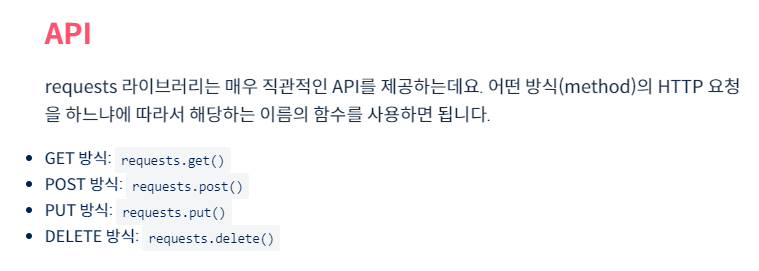

In [19]:
# 네이버 메뉴 가져오기
import requests    # 웹 페이지의 정보를 요청하는 기능
from bs4 import BeautifulSoup as bs

In [20]:
url="https://www.naver.com/"   # 접속할 웹 주소
html_txt=requests.get(url)     # 웹상에서 정보 요청하기

In [ ]:
# print(html_txt.content)  # 컴퓨터 기준 내용 보여주기
# print(html_txt.text)     # 사용자(사람) 기준 내용 보여주기

In [21]:
soub=bs(html_txt.content, "html.parser")  # 파싱 진행
ul_txt=soub.find("ul", class_="list_nav type_fix")
print(ul_txt)

<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>
<

In [22]:
lis_txt=ul_txt.find_all('li')
print(lis_txt)

for li in lis_txt:
    print(li.get_text())

[<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>, <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>, <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>, <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>, <li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>, <li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>, <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>, <li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>]

메일

카페
블로그
지식iN
쇼핑
쇼핑L